---
format: html
editor: visual
markdown:
  wrap: 72
---

Vamos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](descargar.png)

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo CSV
airbnb = pd.read_csv('airbnb-listings.csv', sep=';')

# Configurar opciones de representación para gráficos
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 300
airbnb.columns


Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

1.  Vamos a quedarnos con las columnas de mayor interés: 'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude' Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio '' Podemos eliminar las siguientes columnas que ya no son necesarias: "Room.Type",'City' Llama a nuevo dataframe df_madrid.


In [2]:

# Selección de columnas
airbnb = airbnb[['City','Room Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square Feet','Guests Included','Extra People','Review Scores Rating','Latitude', 'Longitude']]

# Creación del DataFrame de Madrid con Room Type = Entire home/apt
df_madrid = airbnb[(airbnb['City'] == "Madrid") & (airbnb['Room Type'] == 'Entire home/apt')]

# Convertimos los datos vacíos de Neighbourhood en NaN
df_madrid.loc[df_madrid['Neighbourhood'] == '', 'Neighbourhood'] = pd.NA

# Eliminamos las filas que tienen NaN en Neighbourhood
df_madrid = df_madrid.dropna(subset=['Neighbourhood'])

# Eliminamos las columnas de City y Room Type
df_madrid = df_madrid.drop(columns=['City', 'Room Type'])

df_madrid



,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude
1,Embajadores,4,1.0,1.0,2.0,50.0,NaN,2,20,77.0,40.409827,-3.704114
6,Goya,3,1.0,2.0,2.0,50.0,NaN,1,0,82.0,40.425168,-3.672521
14,La Latina,4,1.0,1.0,2.0,60.0,NaN,2,20,93.0,40.408108,-3.709992
17,Sol,5,1.0,0.0,1.0,99.0,NaN,2,15,100.0,40.417526,-3.703593
19,Justicia,2,1.0,1.0,1.0,68.0,NaN,1,30,90.0,40.420204,-3.696521
...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Palacio,4,1.5,2.0,3.0,101.0,NaN,2,20,99.0,40.418063,-3.712571
14769,Argüelles,6,2.0,3.0,3.0,180.0,NaN,2,20,96.0,40.421616,-3.718255
14770,La Latina,5,1.0,2.0,4.0,200.0,NaN,1,0,NaN,40.408706,-3.708193
14771,Sol,8,2.0,3.0,5.0,175.0,NaN,6,0,99.0,40.417090,-3.706646


------------------------------------------------------------------------

2.  Crea una nueva columna llamada Square.Meters a partir de Square.Feet. Recuerda que un pie cuadrado son 0.092903 metros cuadrados.



In [3]:
# Añadir columna de metros cuadrados convirtiendo la columna de pies cuadrados
rate_to_square_meter = 0.092903

df_madrid['Square Meter'] = df_madrid['Square Feet'] * rate_to_square_meter

df_madrid


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meter
1,Embajadores,4,1.0,1.0,2.0,50.0,NaN,2,20,77.0,40.409827,-3.704114,NaN
6,Goya,3,1.0,2.0,2.0,50.0,NaN,1,0,82.0,40.425168,-3.672521,NaN
14,La Latina,4,1.0,1.0,2.0,60.0,NaN,2,20,93.0,40.408108,-3.709992,NaN
17,Sol,5,1.0,0.0,1.0,99.0,NaN,2,15,100.0,40.417526,-3.703593,NaN
19,Justicia,2,1.0,1.0,1.0,68.0,NaN,1,30,90.0,40.420204,-3.696521,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Palacio,4,1.5,2.0,3.0,101.0,NaN,2,20,99.0,40.418063,-3.712571,NaN
14769,Argüelles,6,2.0,3.0,3.0,180.0,NaN,2,20,96.0,40.421616,-3.718255,NaN
14770,La Latina,5,1.0,2.0,4.0,200.0,NaN,1,0,NaN,40.408706,-3.708193,NaN
14771,Sol,8,2.0,3.0,5.0,175.0,NaN,6,0,99.0,40.417090,-3.706646,NaN


------------------------------------------------------------------------

3.  ¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?


In [4]:
# Porcentaje de apartamentos que no muestran metros cuadrados 
total_apartment = len(df_madrid)  # Total de apartamentos
na_apartment = df_madrid['Square Meter'].isna().sum()  # Apartamentos que tienen NaN como valor
percentage_na_apartment = (na_apartment / total_apartment) * 100
print('El porcentaje de apartamentos que no muestran los metros cuadrados es', round(percentage_na_apartment, 2), '%')


El porcentaje de apartamentos que no muestran los metros cuadrados es 93.8 %


In [5]:

from scipy.stats import binomtest
p_value = binomtest(na_apartment, total_apartment)

print(p_value)




BinomTestResult(k=5254, n=5601, alternative='two-sided', statistic=0.9380467773611855, pvalue=0.0)


------------------------------------------------------------------------

4.  De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA ¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?


In [6]:
# Porcentaje de apartamentos con 0 m2 de los apartamentos que tienen datos
apartment_square_meter = df_madrid.dropna(subset=['Square Meter'])  # Eliminar filas con NaN en Square.Meter
total_apartment_no_0 = len(apartment_square_meter)  # Total de apartamentos de los que tenemos datos
zero_apartment = (apartment_square_meter['Square Meter'] == 0).sum()  # Apartamentos que tienen 0 como valor
percentage_zero_apartment = (zero_apartment / total_apartment_no_0) * 100
print('El porcentaje de apartamentos con 0 metros cuadrados es', round(percentage_zero_apartment, 2), '%')


El porcentaje de apartamentos con 0 metros cuadrados es 36.89 %


In [7]:
# Con función binomtest
p_value = binomtest(zero_apartment, total_apartment_no_0)

print(p_value)

BinomTestResult(k=128, n=347, alternative='two-sided', statistic=0.3688760806916426, pvalue=1.1855946413618733e-06)


------------------------------------------------------------------------

5.  Reemplazar todos los 0m\^2 por NA


In [8]:
# Reemplazar los valores de 0 en la columna 'Square.Meter' con NaN
df_madrid.loc[df_madrid['Square Meter'] == 0, 'Square Meter'] = pd.NA

df_madrid

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meter
1,Embajadores,4,1.0,1.0,2.0,50.0,NaN,2,20,77.0,40.409827,-3.704114,NaN
6,Goya,3,1.0,2.0,2.0,50.0,NaN,1,0,82.0,40.425168,-3.672521,NaN
14,La Latina,4,1.0,1.0,2.0,60.0,NaN,2,20,93.0,40.408108,-3.709992,NaN
17,Sol,5,1.0,0.0,1.0,99.0,NaN,2,15,100.0,40.417526,-3.703593,NaN
19,Justicia,2,1.0,1.0,1.0,68.0,NaN,1,30,90.0,40.420204,-3.696521,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Palacio,4,1.5,2.0,3.0,101.0,NaN,2,20,99.0,40.418063,-3.712571,NaN
14769,Argüelles,6,2.0,3.0,3.0,180.0,NaN,2,20,96.0,40.421616,-3.718255,NaN
14770,La Latina,5,1.0,2.0,4.0,200.0,NaN,1,0,NaN,40.408706,-3.708193,NaN
14771,Sol,8,2.0,3.0,5.0,175.0,NaN,6,0,99.0,40.417090,-3.706646,NaN


------------------------------------------------------------------------

Hay muchos NAs, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA. Pero **antes de crear el modelo** vamos a hacer: \* pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más. \* crear una variable sintética nueva basada en la similitud entre barrios que usaremos en nuestro modelo.

6.  Pinta el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más


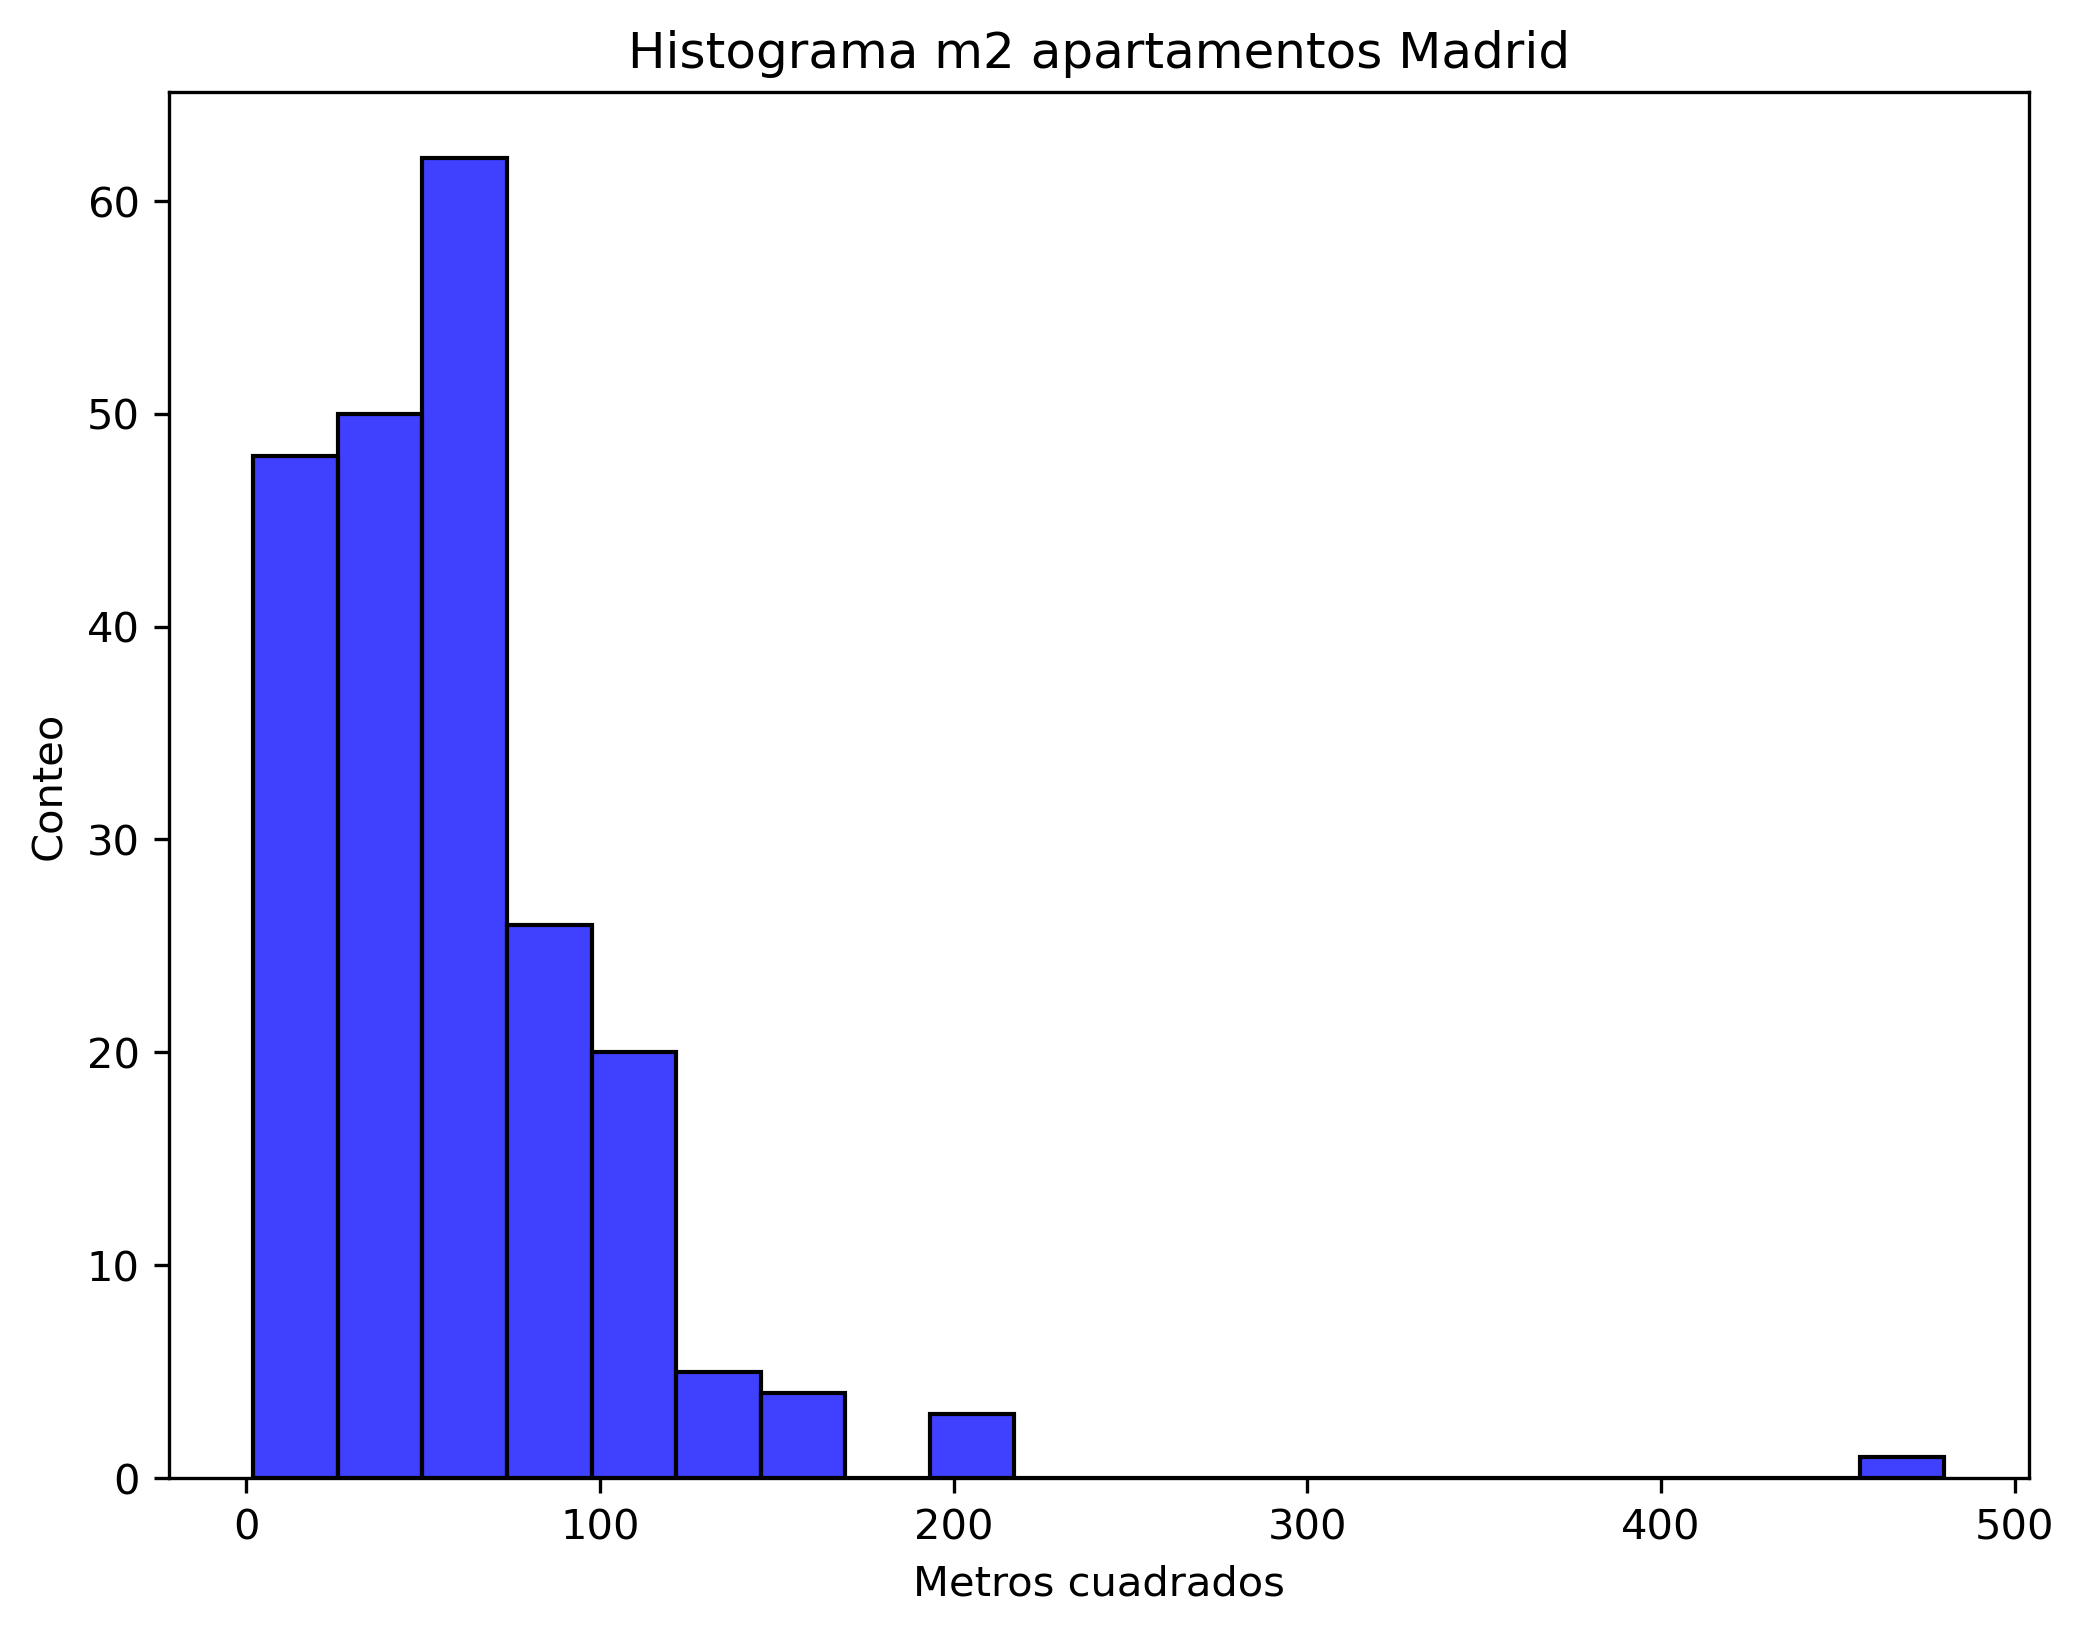

In [9]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt

# En Python con seaborn
plt.figure(figsize=(8, 6))
sns.histplot(df_madrid['Square Meter'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Metros cuadrados')
plt.ylabel('Conteo')
plt.title('Histograma m2 apartamentos Madrid')
plt.show()


------------------------------------------------------------------------

7.  Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m\^2

In [10]:
# Reemplazar los valores menores de 20 m2 en la columna 'Square.Meter' con NaN
df_madrid.loc[df_madrid['Square Meter'] < 20, 'Square Meter'] = pd.NA

df_madrid

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meter
1,Embajadores,4,1.0,1.0,2.0,50.0,NaN,2,20,77.0,40.409827,-3.704114,NaN
6,Goya,3,1.0,2.0,2.0,50.0,NaN,1,0,82.0,40.425168,-3.672521,NaN
14,La Latina,4,1.0,1.0,2.0,60.0,NaN,2,20,93.0,40.408108,-3.709992,NaN
17,Sol,5,1.0,0.0,1.0,99.0,NaN,2,15,100.0,40.417526,-3.703593,NaN
19,Justicia,2,1.0,1.0,1.0,68.0,NaN,1,30,90.0,40.420204,-3.696521,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Palacio,4,1.5,2.0,3.0,101.0,NaN,2,20,99.0,40.418063,-3.712571,NaN
14769,Argüelles,6,2.0,3.0,3.0,180.0,NaN,2,20,96.0,40.421616,-3.718255,NaN
14770,La Latina,5,1.0,2.0,4.0,200.0,NaN,1,0,NaN,40.408706,-3.708193,NaN
14771,Sol,8,2.0,3.0,5.0,175.0,NaN,6,0,99.0,40.417090,-3.706646,NaN


------------------------------------------------------------------------

8.  Existen varios Barrios que todas sus entradas de Square.Meters son NA, vamos a eliminar del dataset todos los pisos que pertenecen a estos barrios.


In [11]:
# Identificar los barrios donde al menos una entrada de 'Square Meter' no es NA
neighbourhood_with_metres = df_madrid.loc[~df_madrid['Square Meter'].isna(), 'Neighbourhood'].unique()

# Filtrar el dataset para mantener solo los registros de estos barrios
df_filter_madrid = df_madrid[df_madrid['Neighbourhood'].isin(neighbourhood_with_metres)]

df_filter_madrid


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meter
1,Embajadores,4,1.0,1.0,2.0,50.0,NaN,2,20,77.0,40.409827,-3.704114,NaN
6,Goya,3,1.0,2.0,2.0,50.0,NaN,1,0,82.0,40.425168,-3.672521,NaN
14,La Latina,4,1.0,1.0,2.0,60.0,NaN,2,20,93.0,40.408108,-3.709992,NaN
17,Sol,5,1.0,0.0,1.0,99.0,NaN,2,15,100.0,40.417526,-3.703593,NaN
19,Justicia,2,1.0,1.0,1.0,68.0,NaN,1,30,90.0,40.420204,-3.696521,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14768,Palacio,4,1.5,2.0,3.0,101.0,NaN,2,20,99.0,40.418063,-3.712571,NaN
14769,Argüelles,6,2.0,3.0,3.0,180.0,NaN,2,20,96.0,40.421616,-3.718255,NaN
14770,La Latina,5,1.0,2.0,4.0,200.0,NaN,1,0,NaN,40.408706,-3.708193,NaN
14771,Sol,8,2.0,3.0,5.0,175.0,NaN,6,0,99.0,40.417090,-3.706646,NaN


-----------------------------------------------------------------------

9.  ¿Tienen todos los barrios los mismos metros cuadrados de media? ¿Con que test lo comprobarías?

In [12]:
from scipy.stats import shapiro, kruskal

statistic, p_value = shapiro(df_filter_madrid['Square Meter'].dropna())

print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)


Estadístico de prueba: 0.6659433245658875
Valor p: 2.4898945006894904e-18


In [13]:
from scipy.stats import kruskal

# Eliminamos las filas con valores NaN en la columna 'Square Meter'
data_without_nan = df_filter_madrid.dropna(subset=['Square Meter'])

# Creamos grupos de datos para cada categoría en 'Neighbourhood'
groups = [data for _, data in data_without_nan.groupby('Neighbourhood')['Square Meter']]

# Realizamos el test de Kruskal-Wallis
statistic, p_value = kruskal(*groups)


print("Estadístico de prueba:", statistic)
print("Valor p:", p_value)

#Con un p-valor menor que 0.05 rechazamos que las medias sean iguales


Estadístico de prueba: 60.00236067427961
Valor p: 0.00975471429660478


------------------------------------------------------------------------

10. Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey. Muestra como de similares o diferentes son los barrios si nos fijámos únicamente en los metros cuadrados de los pisos. ¿Como se diferencia la media del Barrio A al Barrio B? (Es decir, cual sería el pvalor suponiendo una H0 en la que las medias son iguales)


             Multiple Comparison of Means - Tukey HSD, FWER=0.05             
     group1           group2       meandiff p-adj    lower     upper   reject
-----------------------------------------------------------------------------
         Acacias          Adelfas    4.9858    1.0 -172.6376  182.6092  False
         Acacias          Almagro  -14.9884    1.0 -192.6118  162.6351  False
         Acacias         Almenara    1.0281    1.0 -111.3108  113.3671  False
         Acacias         Arapiles   32.5315    1.0 -107.8921  172.9552  False
         Acacias        Argüelles   19.0141    1.0 -106.5846  144.6129  False
         Acacias          Barajas  -27.9948    1.0 -205.6182  149.6287  False
         Acacias      Carabanchel   11.6748    1.0 -113.9239  137.2735  False
         Acacias       Castellana    51.716 0.9998  -73.8827  177.3147  False
         Acacias         Castilla   17.0322    1.0 -108.5665   142.631  False
         Acacias           Centro  -39.9793    1.0 -217.6027  13

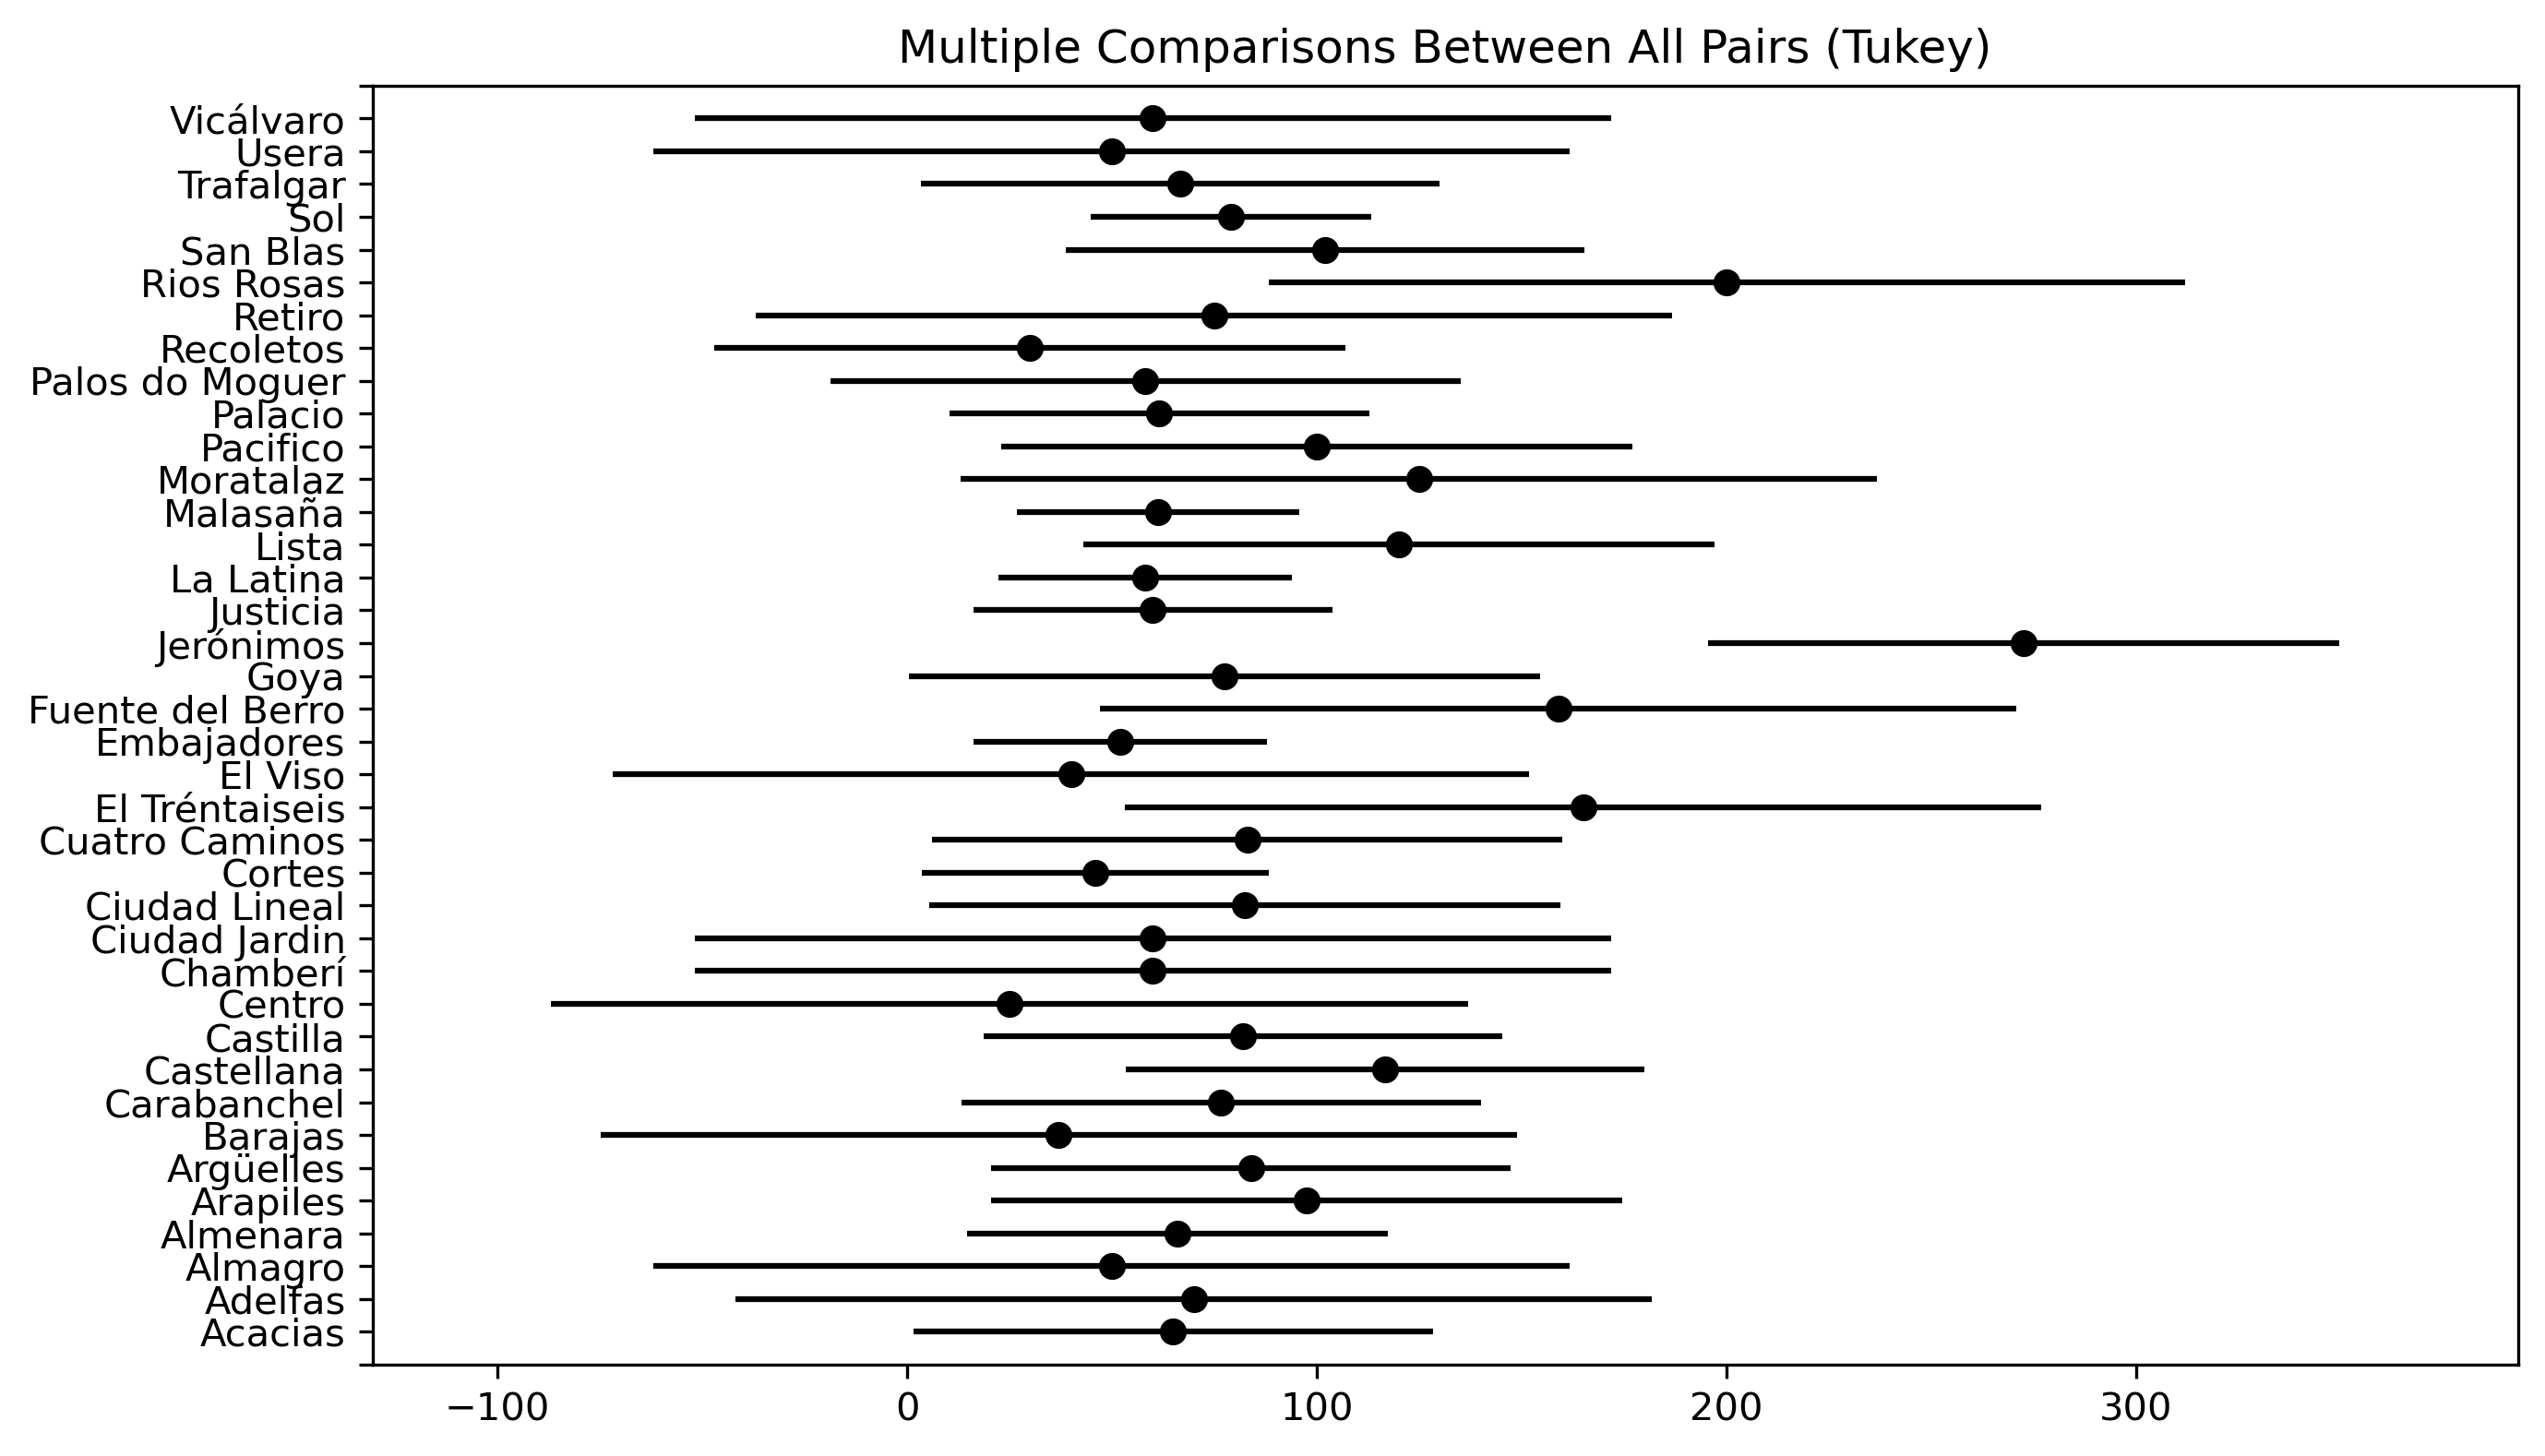

In [14]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import numpy as np

# Verificar si hay valores NaN o Inf en los datos
if np.isnan(df_filter_madrid['Square Meter']).any() or np.isinf(df_filter_madrid['Square Meter']).any():
    # Manejar los valores NaN o Inf
    df_filter_madrid = df_filter_madrid.dropna(subset=['Square Meter'])
    df_filter_madrid = df_filter_madrid.replace([np.inf, -np.inf], np.nan).dropna(subset=['Square Meter'])

# Aplicar el test de Tukey
tukey = pairwise_tukeyhsd(endog=df_filter_madrid['Square Meter'], groups=df_filter_madrid['Neighbourhood'])

# Mostrar el resumen del test de Tukey
tukey_result = tukey.summary()
print(tukey_result)

# Graficar la matriz de comparaciones múltiples
tukey.plot_simultaneous()
plt.show()




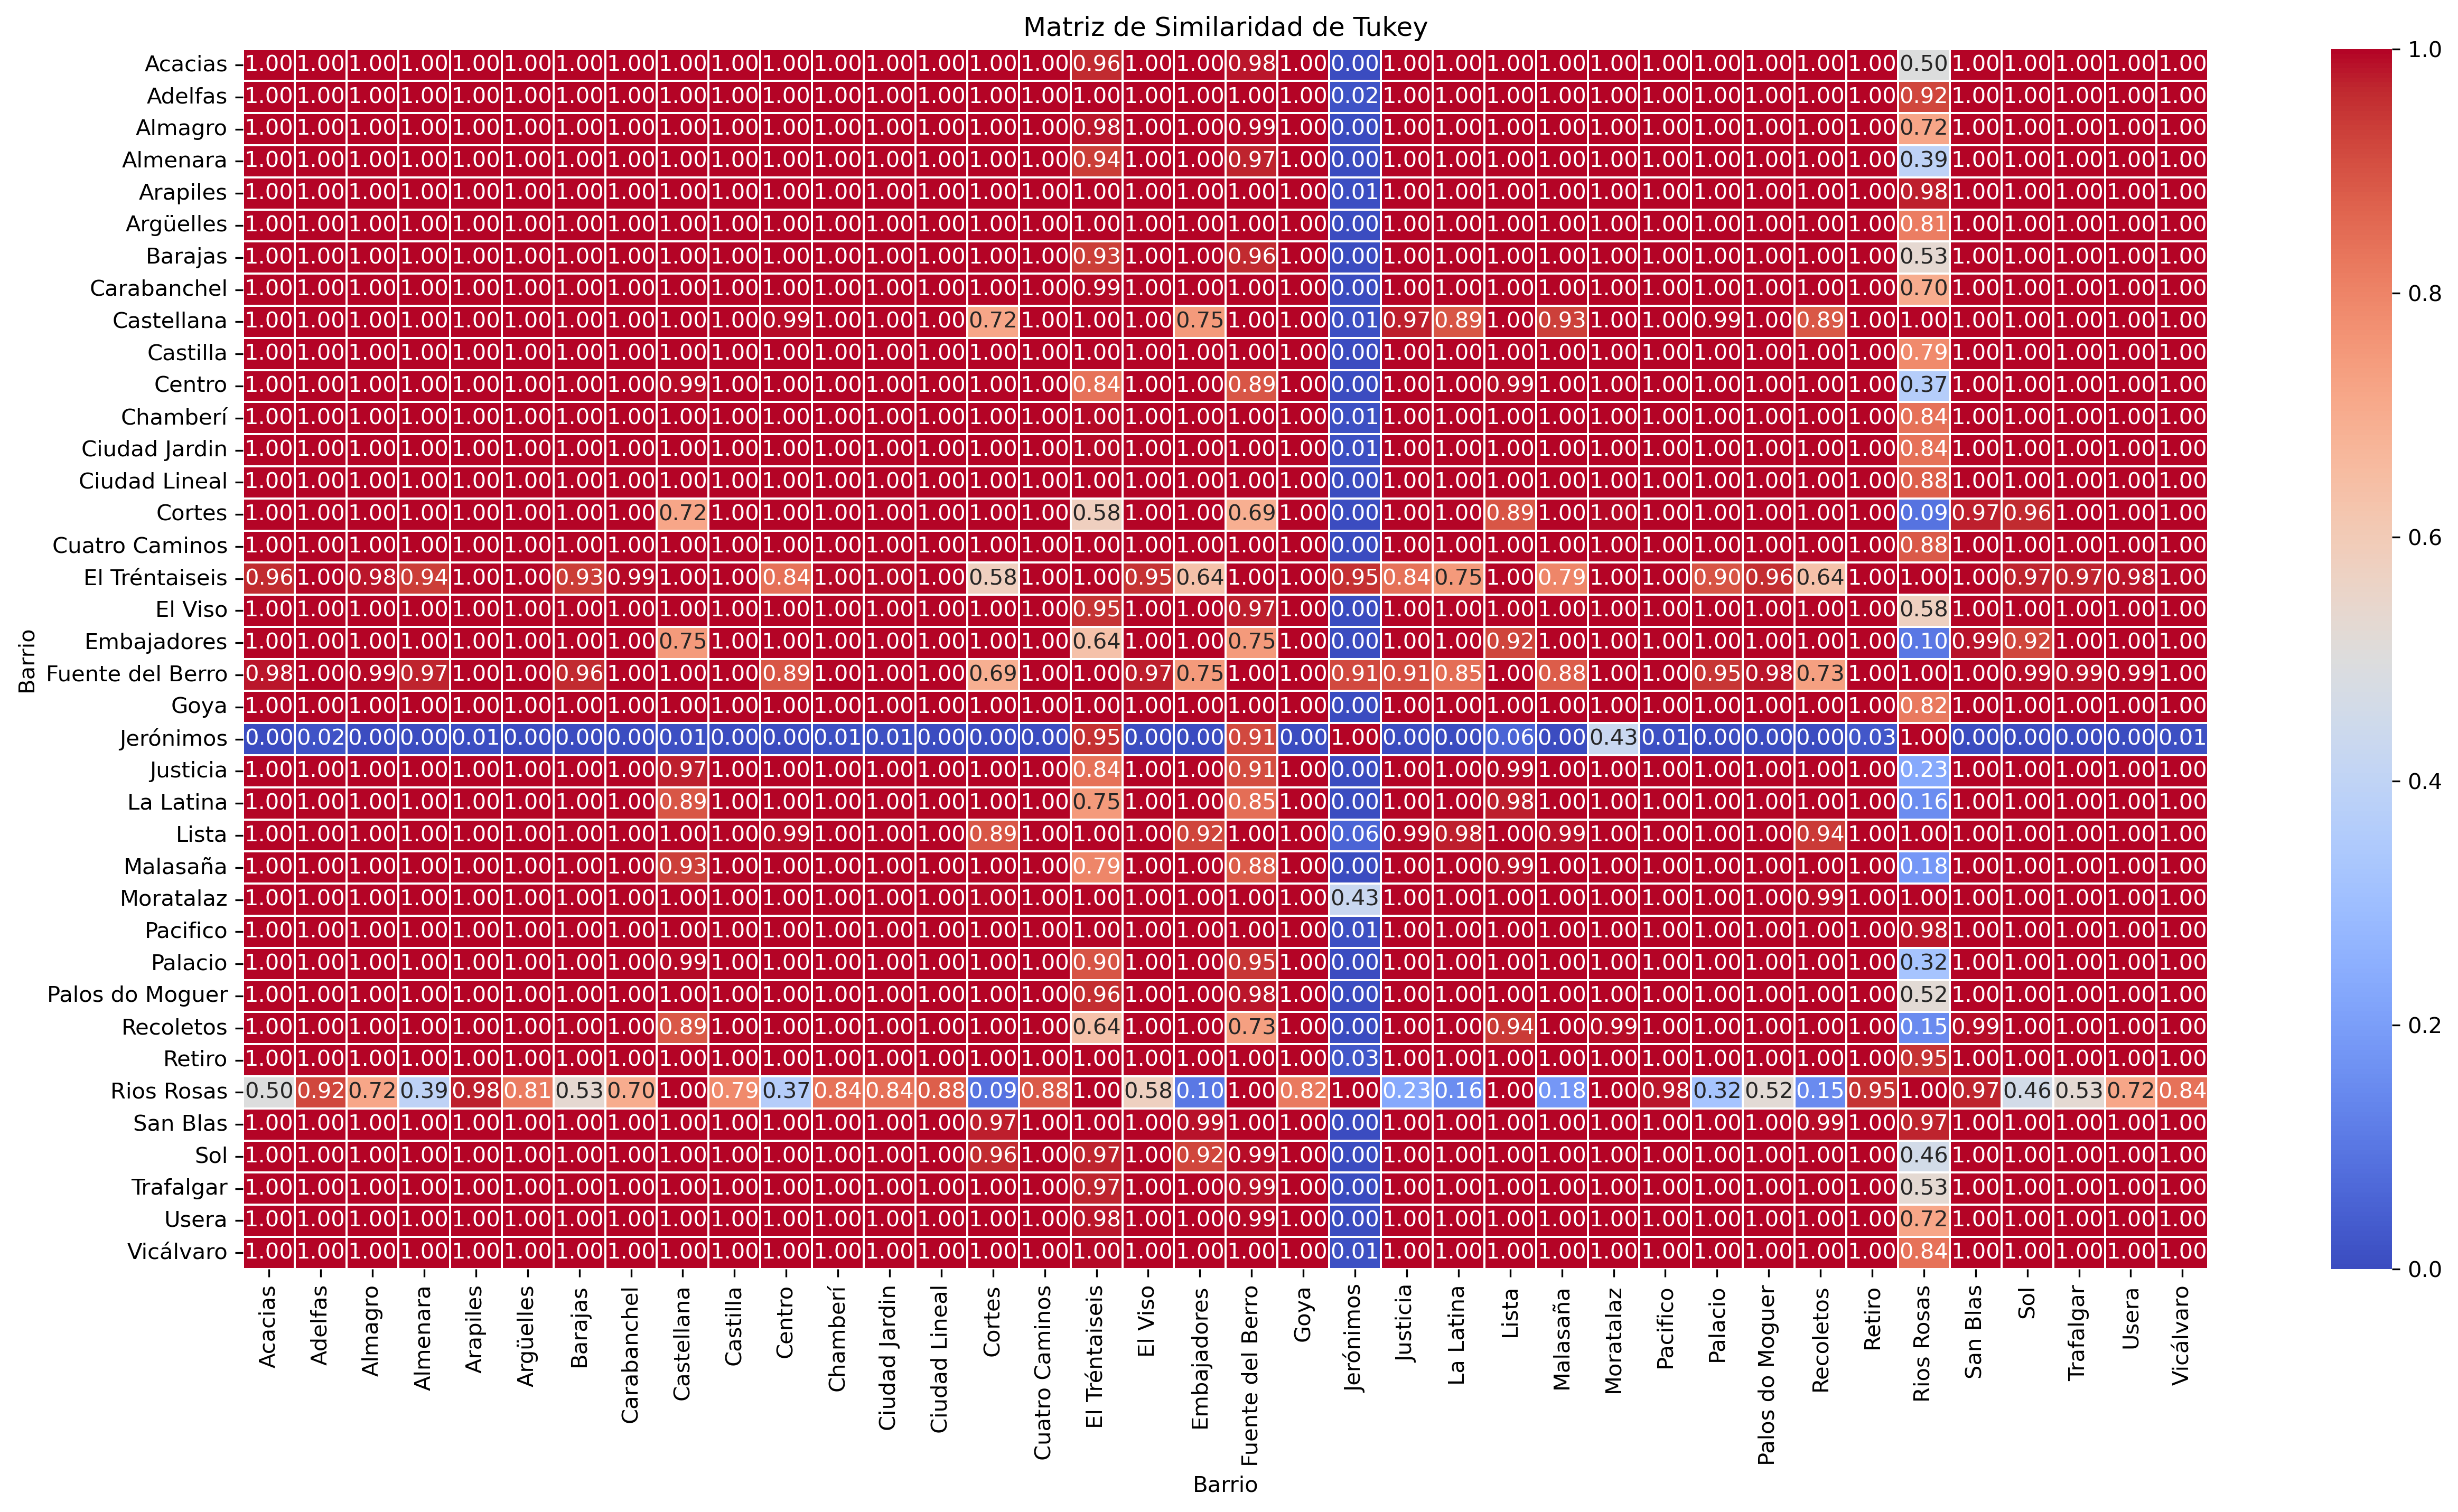

In [15]:
import numpy as np

# Crear una matriz de resultados vacía
tukey_result_df = pd.DataFrame(tukey_result.data[1:], columns=tukey_result.data[0])

# Crear una matriz de resultados vacía
cn = np.sort(df_filter_madrid['Neighbourhood'].unique())
resm = np.full((len(cn), len(cn)), np.nan)
np.fill_diagonal(resm, 1)

# Llenar la matriz con los valores de p-valor de Tukey
for i, row in tukey_result_df.iterrows():
    resm[cn == row['group1'], cn == row['group2']] = row['p-adj']
    resm[cn == row['group2'], cn == row['group1']] = row['p-adj']

# Convertir la matriz en un DataFrame
df_resm = pd.DataFrame(resm, index=cn, columns=cn)

# Crear el gráfico de la matriz de similaridad
plt.figure(figsize=(20, 10))
sns.heatmap(df_resm, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.xlabel('Barrio')
plt.ylabel('Barrio')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Matriz de Similaridad de Tukey')
plt.show()


------------------------------------------------------------------------

11. En el punto anterior has creado una matriz de p-valores que indica como de parecidos son dos barrios. Si su pvalor es alto significa que los barrios son diferentes, si es bajo significa que los barrios se parecen. Esta matriz la podemos usar como matriz de distancia si restamos el pvalor a 1. Es decir si usamos como distancia 1-pvalor. De esta forma barrios con un pvalor alto tendrán una distancia mayor que aquellos con un pvalor bajo. Usando esta última métrica como matriz de distancias dibuja un dendrograma de los diferentes barrios.

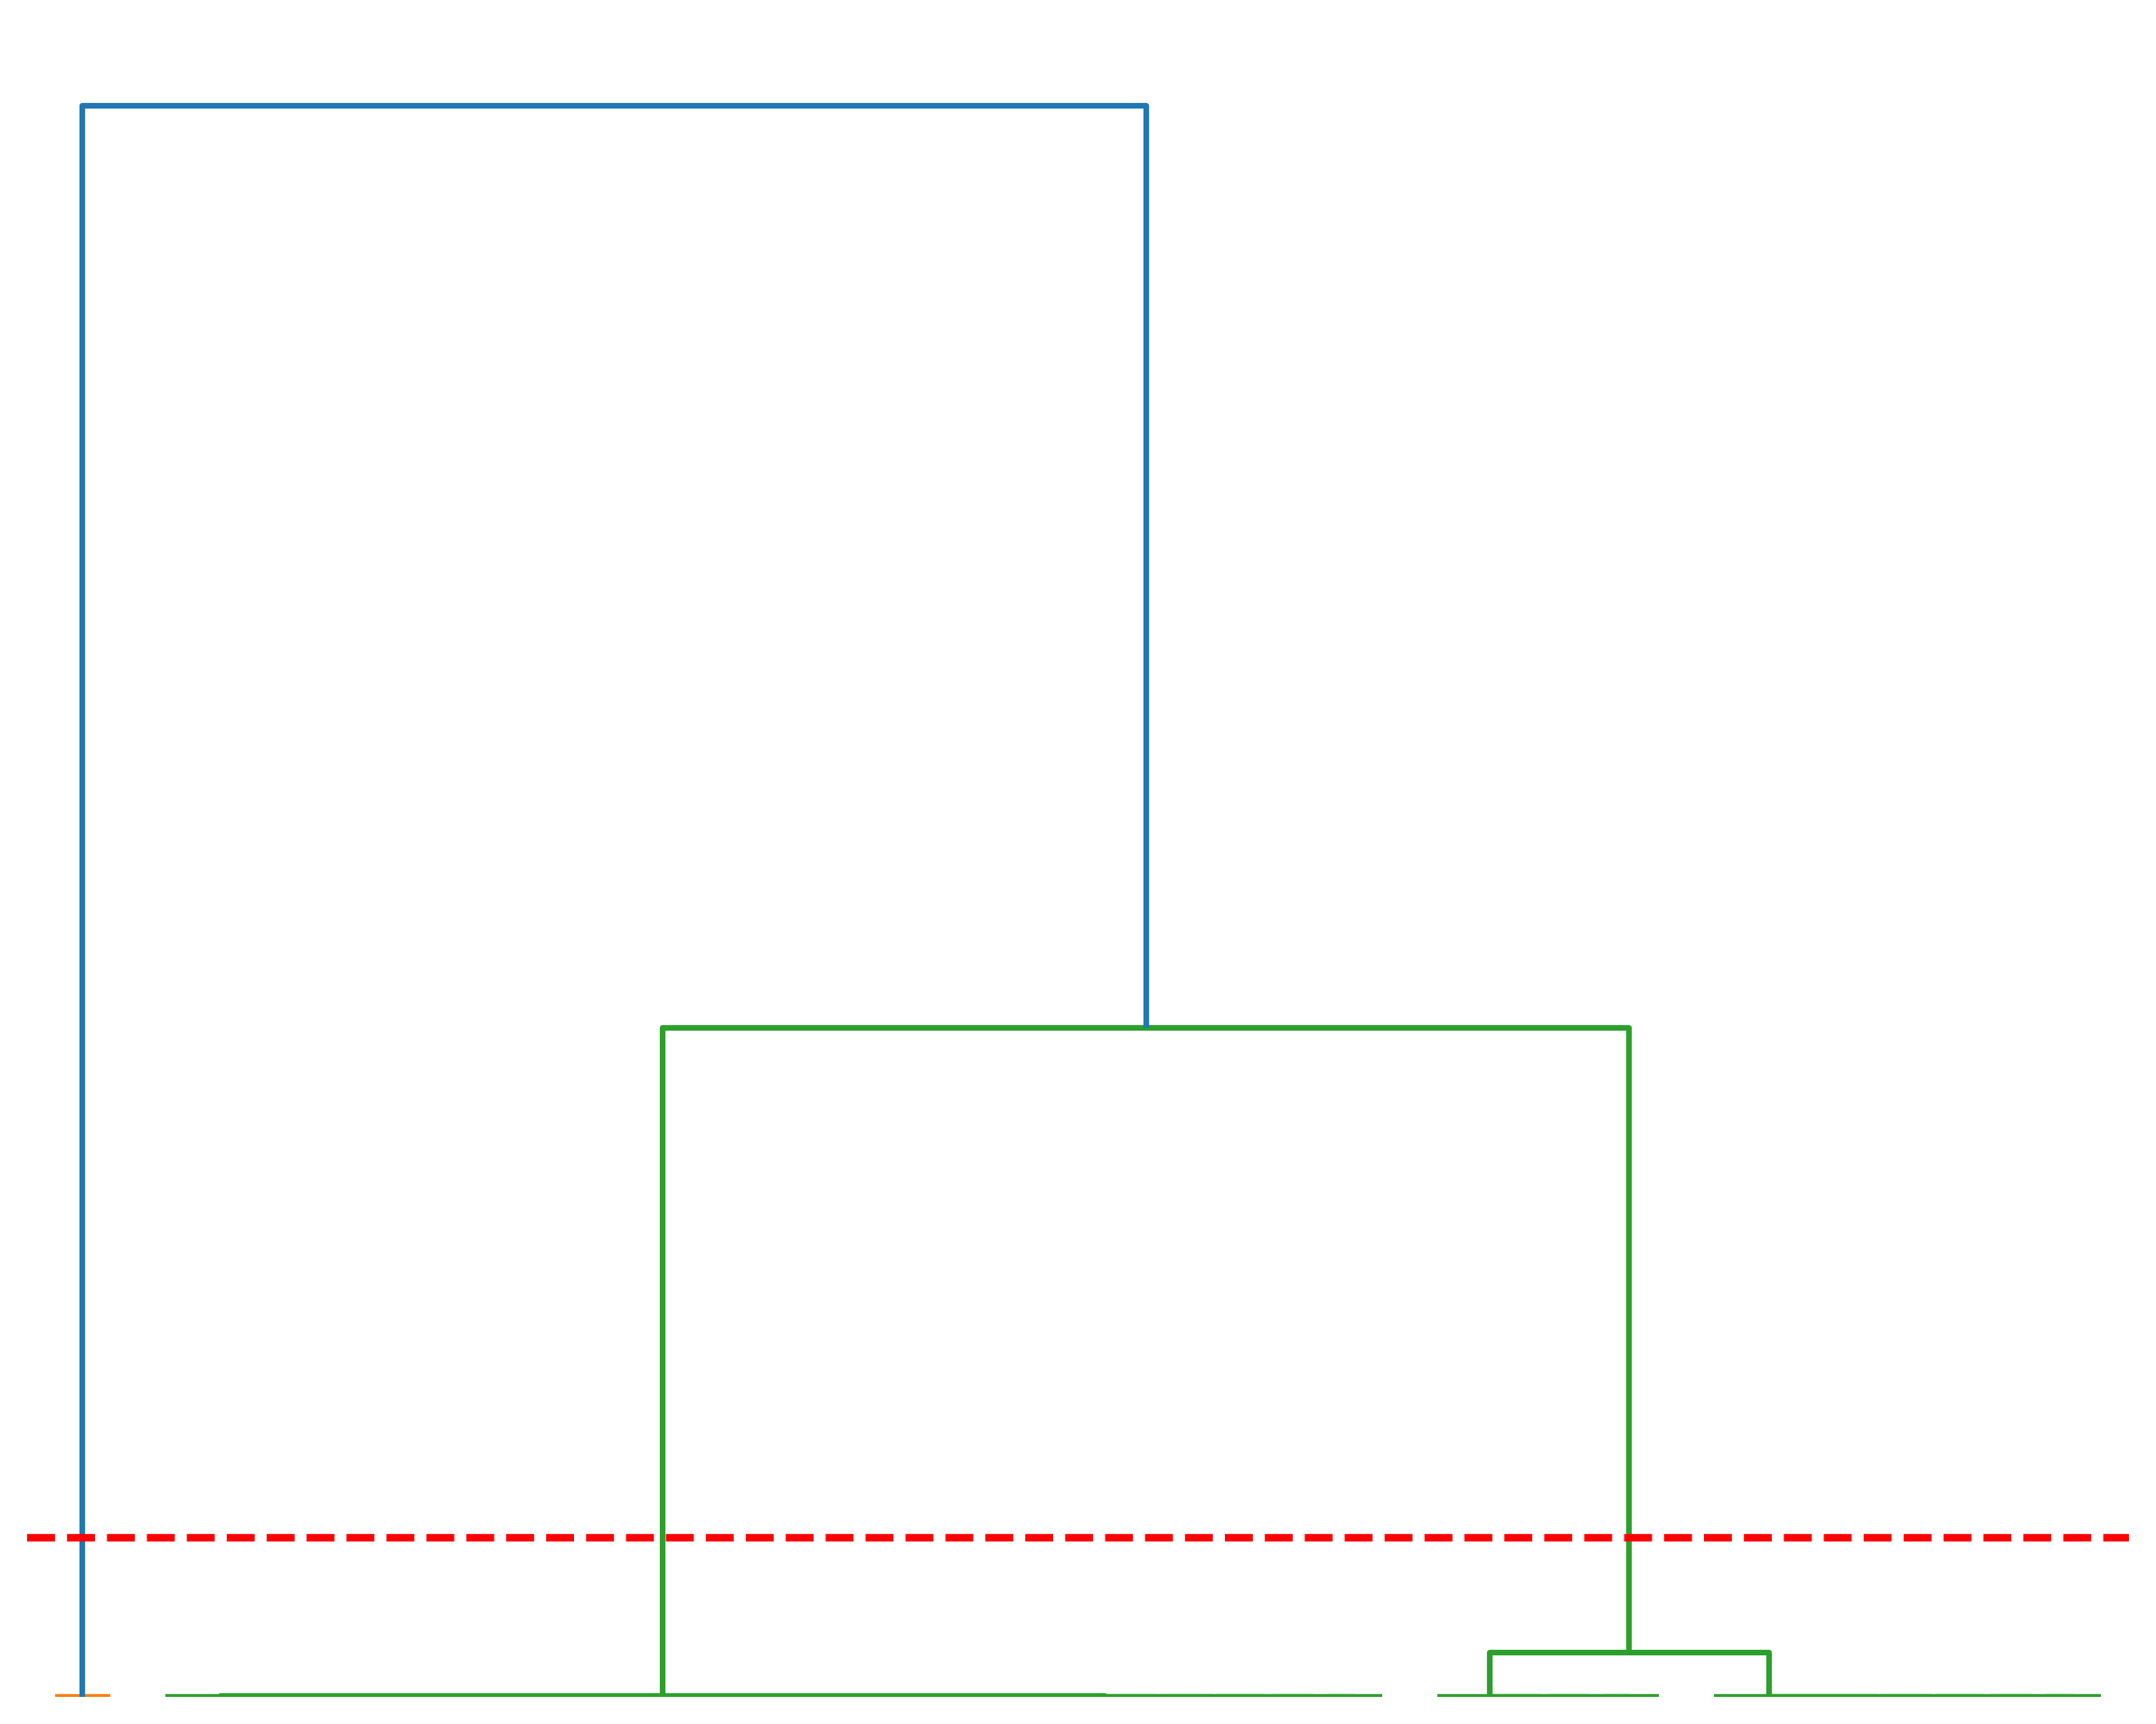

In [16]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


distance = squareform(1 - np.abs(resm))
hcd = linkage(distance, method='complete')

# Visualización del dendrograma
plt.figure(figsize=(10, 8))
madrid_dend = dendrogram(hcd, leaf_font_size=8, )

# Ajustes de visualización
plt.gca().set_axis_off()
plt.gca().set_aspect('auto', adjustable='box')
plt.gca().get_xaxis().set_visible(False)
plt.gca().get_yaxis().set_visible(False)
plt.gca().autoscale_view('tight')

# Línea roja en la posición 0.1
plt.axhline(y=0.1, color='red', linestyle='--', linewidth=2)
plt.show()



------------------------------------------------------------------------

12. ¿Que punto de corte sería el aconsejable?, ¿cuantos clusters aparecen?

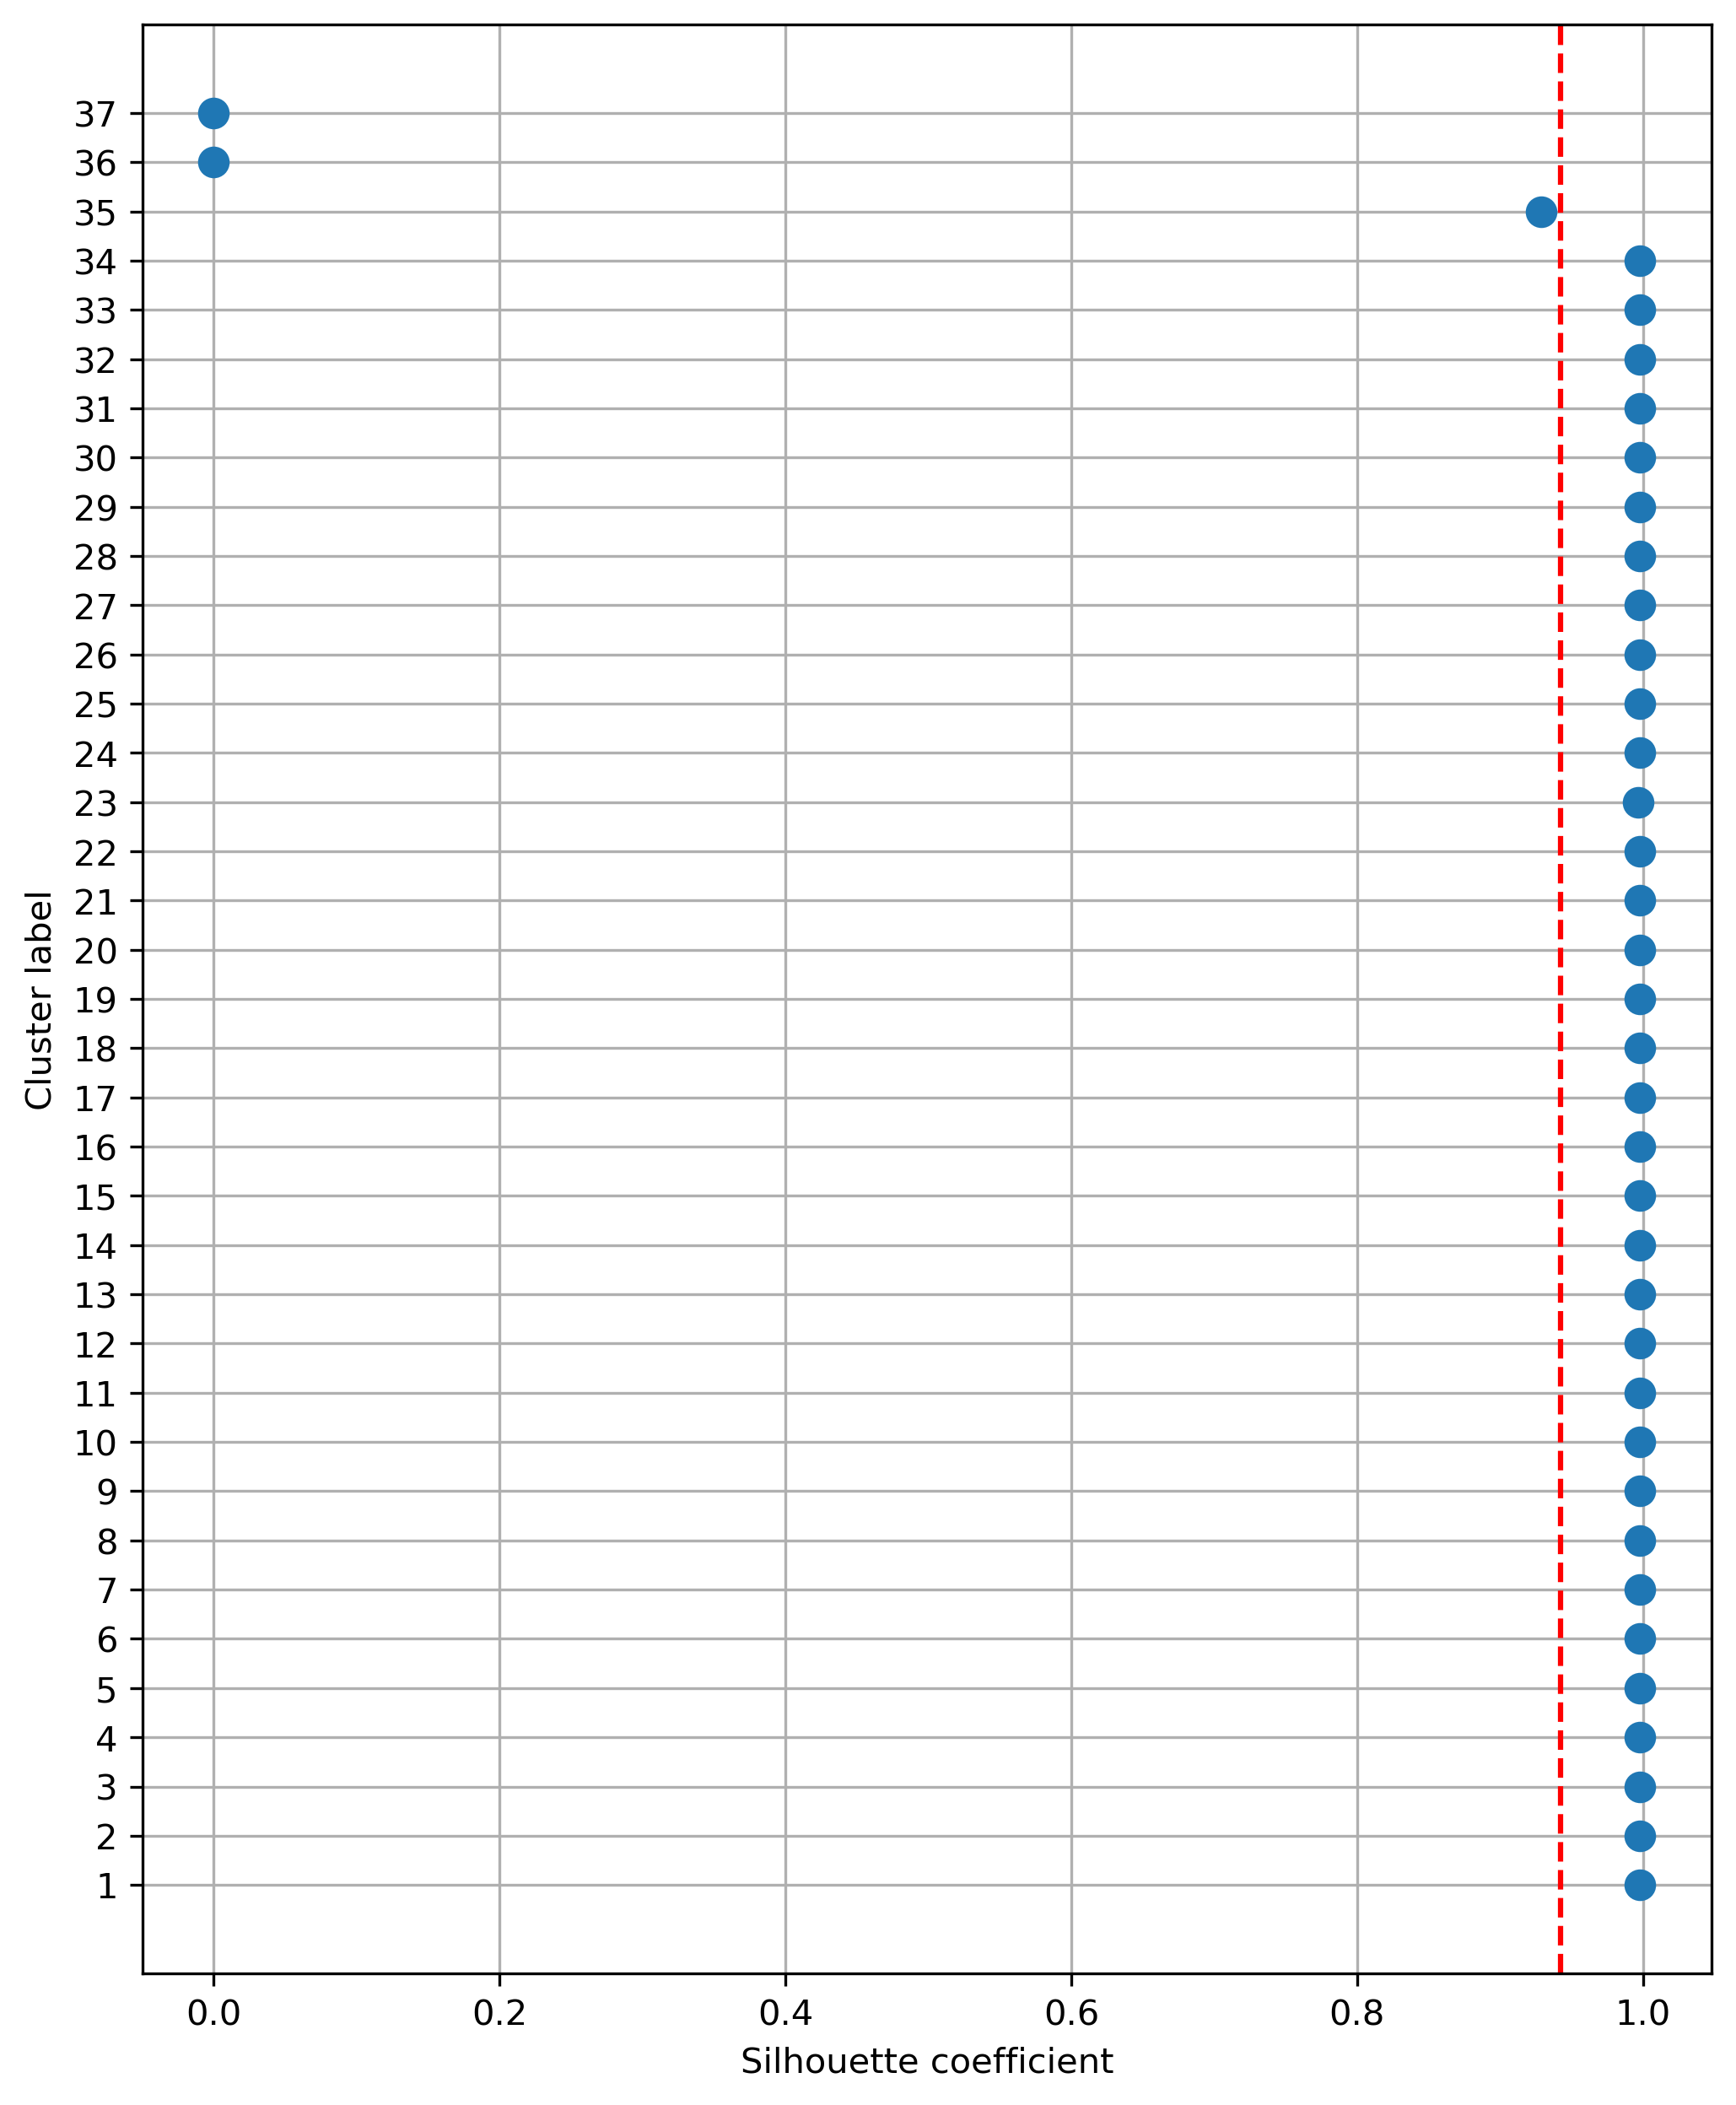

In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples
import numpy as np

# Suponiendo que 'madrid_dend' es tu dendrograma generado previamente en Python

# Cálculo de los clusters usando un umbral de altura de 0.1
clusters = AgglomerativeClustering(n_clusters=None, distance_threshold=0.1).fit_predict(np.array(madrid_dend['dcoord']))

# Cálculo de los valores de silhouette
ss = silhouette_samples(np.array(madrid_dend['dcoord']), clusters)
ss
# Visualización del silhouette plot
plt.figure(figsize=(8, 10))
plt.plot(ss, range(len(clusters)), 'o', markersize=8)

# Ajustes de visualización
plt.xlabel('Silhouette coefficient')
plt.ylabel('Cluster label')
plt.axvline(x=np.mean(ss), color='red', linestyle='--')
plt.yticks(range(len(clusters)), range(1, len(clusters) + 1))
plt.grid(True)

plt.show()


------------------------------------------------------------------------

13. Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id


In [42]:
# Crear un diccionario que mapee los nombres de los barrios a los valores de cluster
neighbourhood_to_cluster = dict(zip(df_filter_madrid['Neighbourhood'], clusters))
# Asignar los valores de los clusters a df_filter_madrid
df_filter_madrid['neighb_id'] = df_filter_madrid['Neighbourhood'].map(neighbourhood_to_cluster)

# Convertir neighb_id a tipo 'factor'
df_filter_madrid['neighb_id'] = df_filter_madrid['neighb_id'].astype('category')

df_filter_madrid

,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meter,neighb_id
49,La Latina,4,1.0,2.0,3.0,65.0,700.0,2,12,93.0,40.408877,-3.713721,65.032100,0.0
84,Justicia,6,NaN,2.0,4.0,102.0,753.0,1,11,81.0,40.423293,-3.698175,69.955959,0.0
90,Cuatro Caminos,4,2.0,1.0,1.0,46.0,603.0,2,7,93.0,40.450210,-3.699102,56.020509,0.0
208,Sol,3,1.0,1.0,1.0,100.0,484.0,2,10,96.0,40.419855,-3.703648,44.965052,2.0
266,Sol,4,1.0,1.0,2.0,70.0,915.0,2,8,100.0,40.417945,-3.701260,85.006245,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14406,Palacio,3,1.0,1.0,1.0,65.0,624.0,2,15,97.0,40.419527,-3.710043,57.971472,NaN
14499,Usera,2,1.0,1.0,1.0,40.0,538.0,1,0,78.0,40.382412,-3.703331,49.981814,NaN
14629,Malasaña,2,1.0,1.0,1.0,70.0,861.0,2,20,91.0,40.421588,-3.707741,79.989483,0.0
14636,Malasaña,4,1.0,2.0,3.0,40.0,484.0,2,10,87.0,40.425860,-3.710491,44.965052,0.0


------------------------------------------------------------------------

14. Vamos a crear dos grupos, uno test y otro train.


In [61]:
import numpy as np

# Establecer la semilla para reproducibilidad
np.random.seed(12345)
df_filter_madrid.reset_index(drop=True, inplace=True)
# Seleccionar los índices de forma aleatoria
sample_size = round(len(df_filter_madrid) * 0.7)
idx = np.random.choice(df_filter_madrid.index, size=sample_size, replace=False)

# Seleccionar los data frames con esos índices
df_madrid_train = df_filter_madrid.iloc[idx]  # DataFrame de entrenamiento
df_madrid_test = df_filter_madrid.drop(idx)   # DataFrame de prueba

print(df_filter_madrid)
print(df_madrid_test)
print(df_madrid_train)


      Neighbourhood  Accommodates  Bathrooms  Bedrooms  Beds  Price  \
0         La Latina             4        1.0       2.0   3.0   65.0   
1          Justicia             6        NaN       2.0   4.0  102.0   
2    Cuatro Caminos             4        2.0       1.0   1.0   46.0   
3               Sol             3        1.0       1.0   1.0  100.0   
4               Sol             4        1.0       1.0   2.0   70.0   
..              ...           ...        ...       ...   ...    ...   
169         Palacio             3        1.0       1.0   1.0   65.0   
170           Usera             2        1.0       1.0   1.0   40.0   
171        Malasaña             2        1.0       1.0   1.0   70.0   
172        Malasaña             4        1.0       2.0   3.0   40.0   
173        Malasaña             6        1.0       2.0   4.0   80.0   

     Square Feet  Guests Included  Extra People  Review Scores Rating  \
0          700.0                2            12                  93.0   
1

------------------------------------------------------------------------

15. Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.


In [68]:
import statsmodels.api as sm
# Eliminar filas con valores faltantes en el conjunto de entrenamiento y de prueba
df_madrid_train.dropna(inplace=True)
df_madrid_test.dropna(inplace=True)

# Definir las variables independientes y dependiente
X_train = df_madrid_train[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]
y_train = df_madrid_train['Square Meter']

# Añadir una constante al conjunto de datos de entrenamiento
X_train = sm.add_constant(X_train)

# Ajustar el modelo de regresión lineal
modelMadrid = sm.OLS(y_train, X_train).fit()

# Imprimir el resumen del modelo
print(modelMadrid.summary())

# Obtener los intervalos de confianza
print(modelMadrid.conf_int())

# Predecir los valores para el conjunto de entrenamiento y de prueba
df_madrid_train['sqm_est'] = modelMadrid.predict(sm.add_constant(df_madrid_train[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]))
df_madrid_test['sqm_est'] = modelMadrid.predict(sm.add_constant(df_madrid_test[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]))


                            OLS Regression Results                            
Dep. Variable:           Square Meter   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     20.84
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           4.63e-16
Time:                        11:49:31   Log-Likelihood:                -405.86
No. Observations:                  93   AIC:                             827.7
Df Residuals:                      85   BIC:                             848.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -50.1964 

/tmp/ipykernel_147858/180076000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_madrid_train.dropna(inplace=True)
/tmp/ipykernel_147858/180076000.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_madrid_train['sqm_est'] = modelMadrid.predict(sm.add_constant(df_madrid_train[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]))


------------------------------------------------------------------------

16. Evaluar la calidad de vuestro modelo


Errores cuadráticos medios y R2 en training:
MSE: 361.52074953202896
R2: 0.6318439555639637

Errores cuadráticos medios y R2 en testing:
MSE: 429.47847358871303
R2: 0.508565527212892


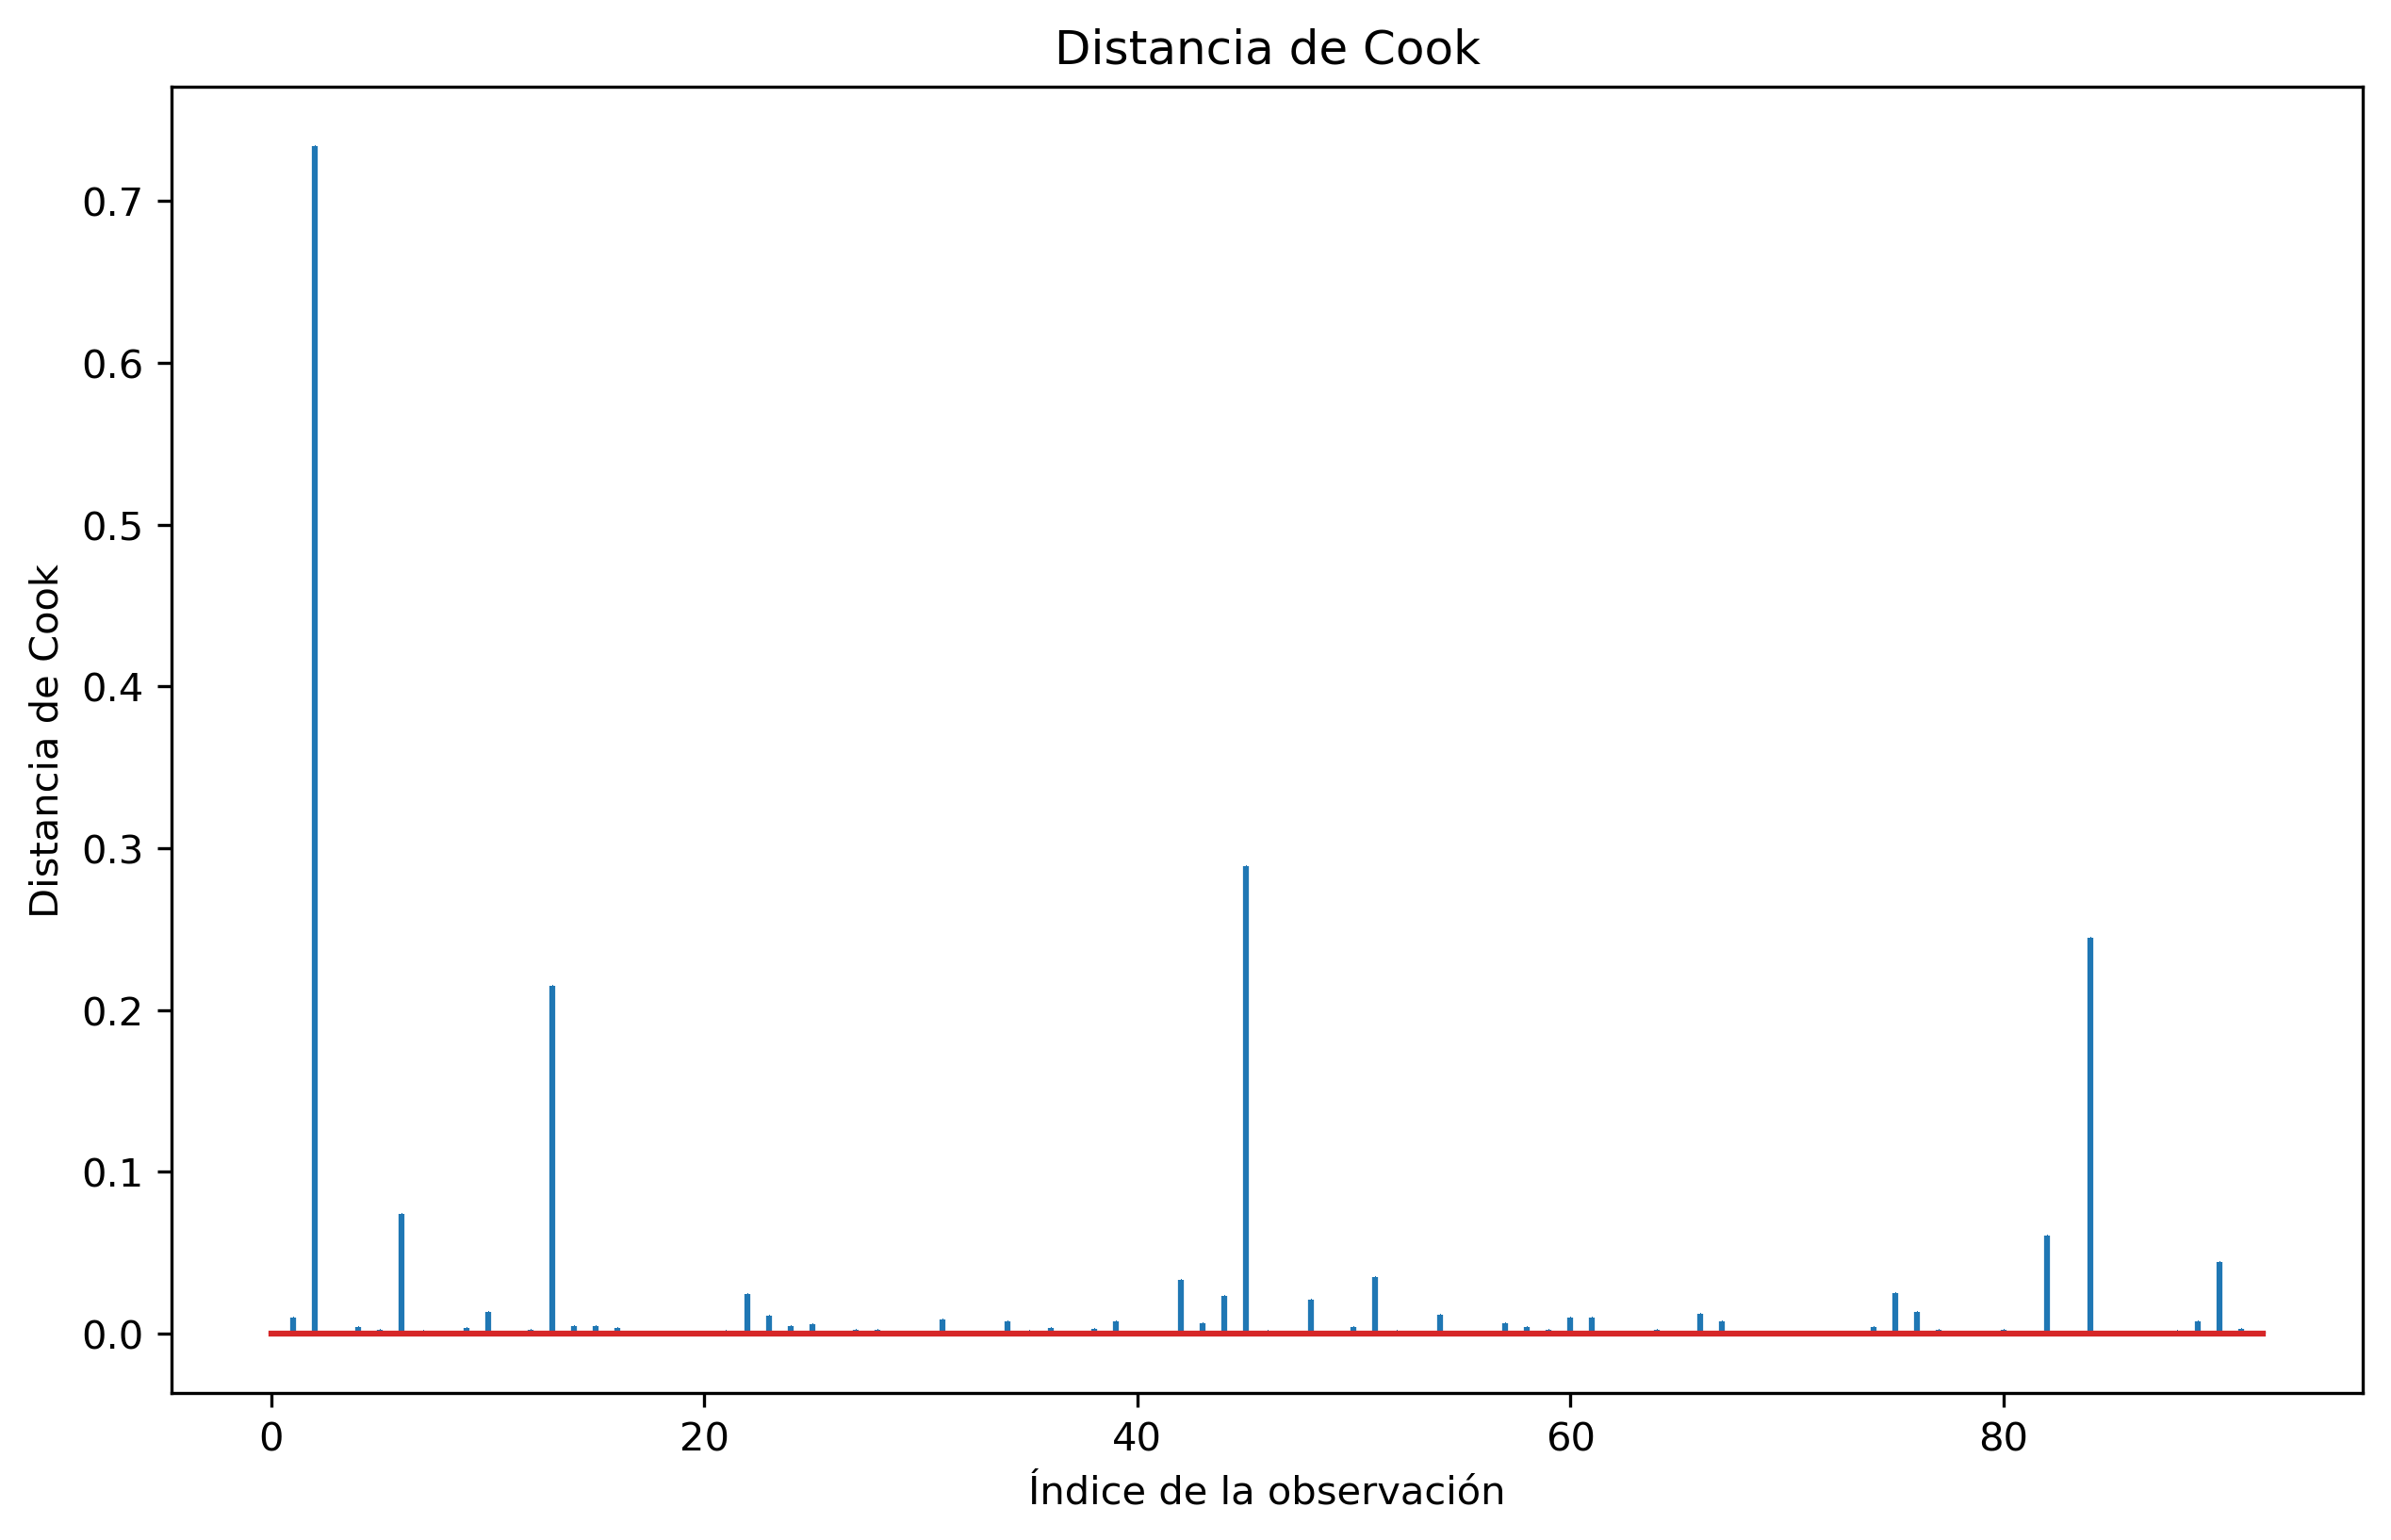

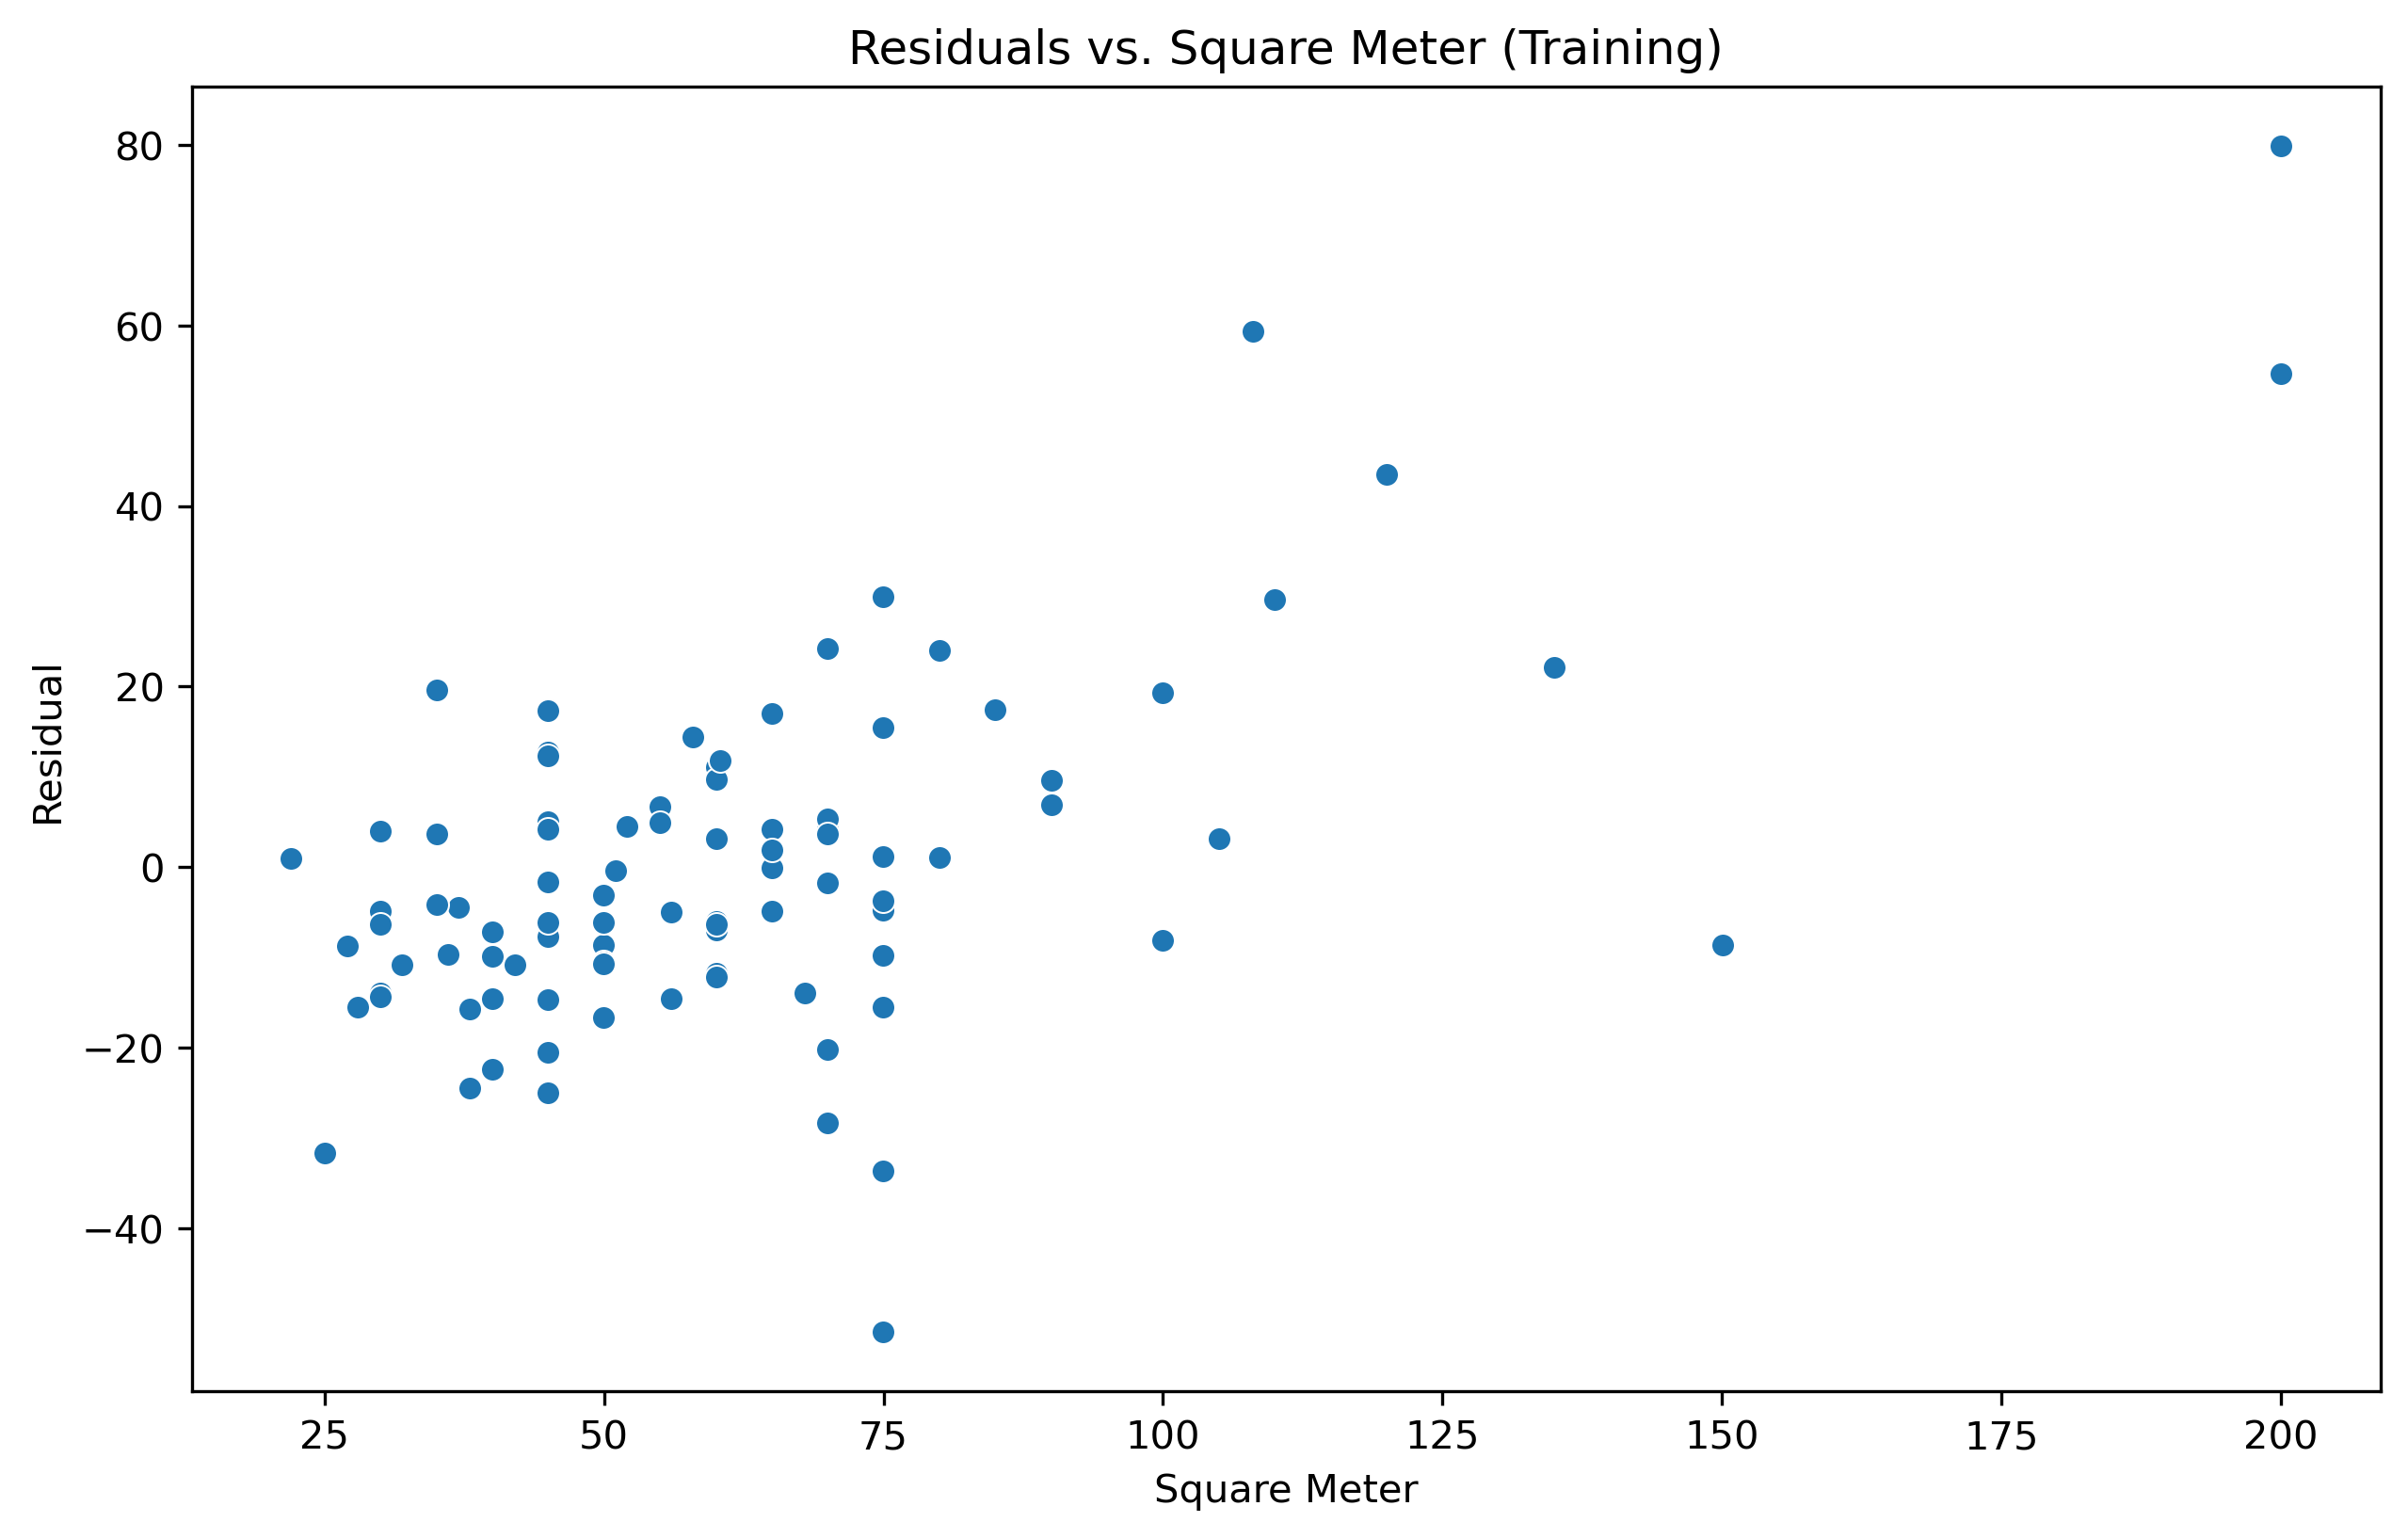

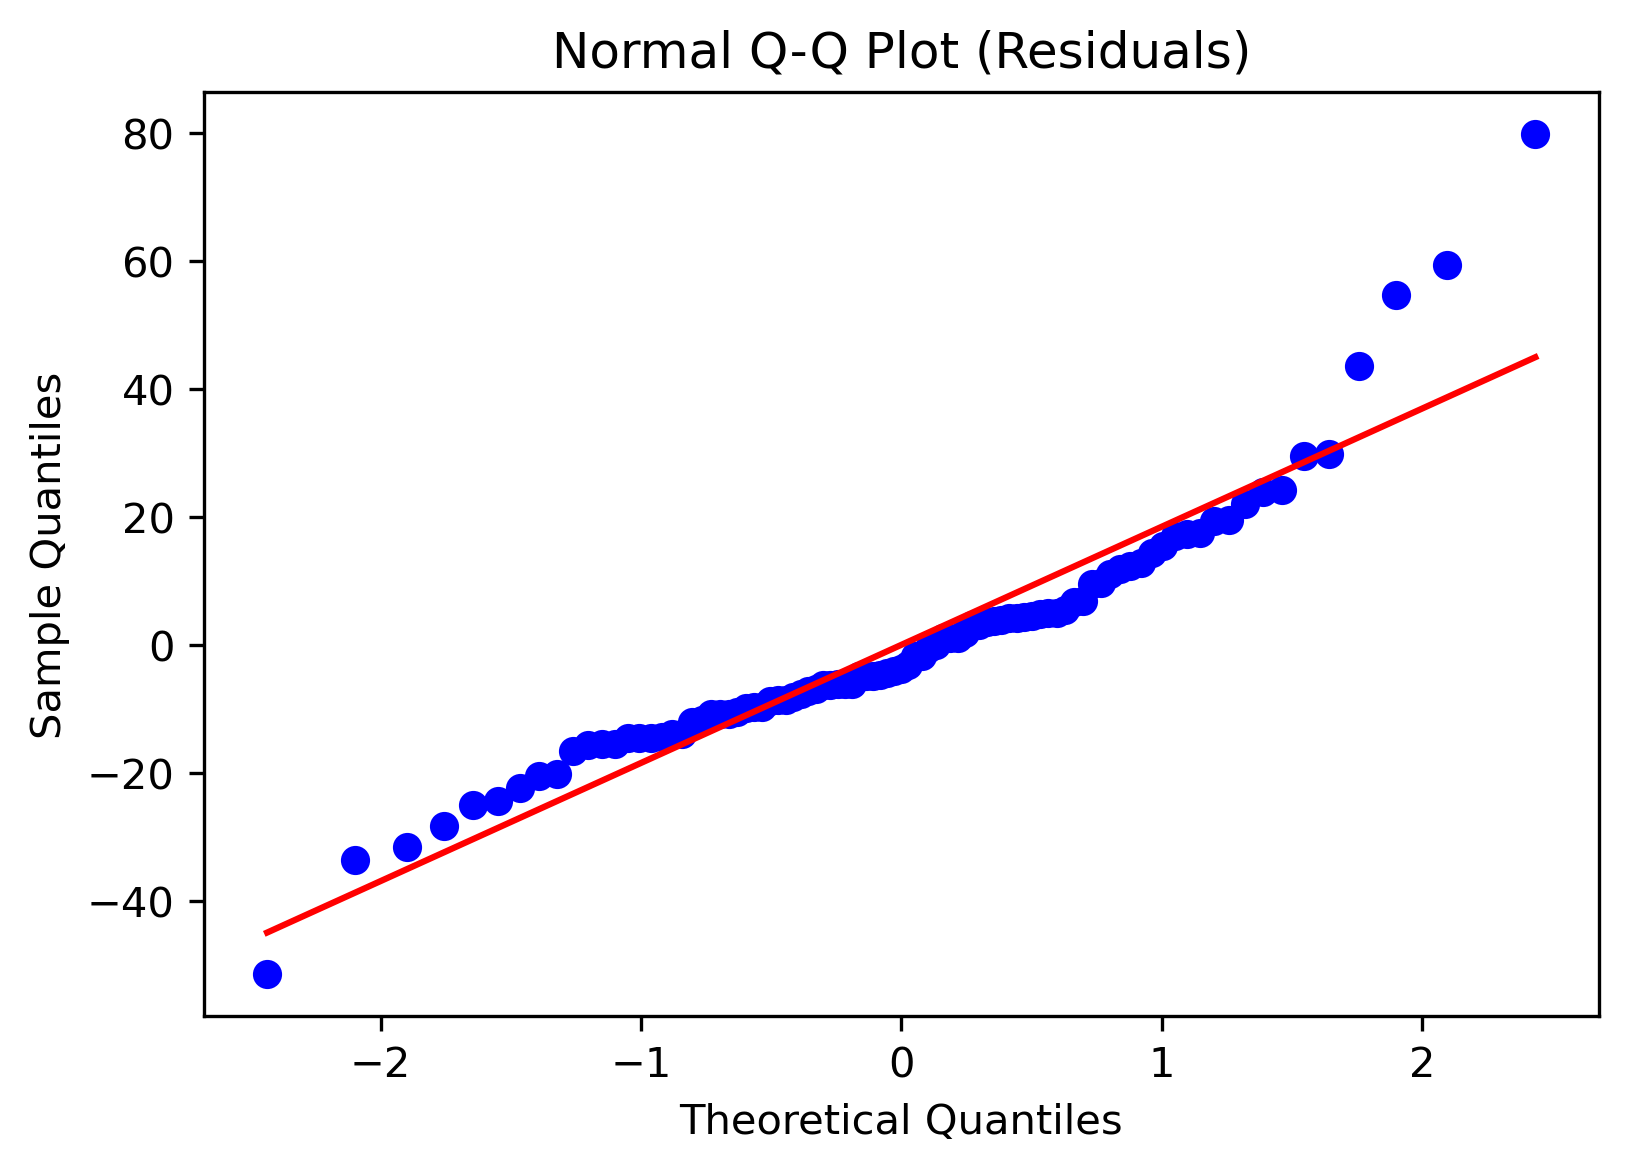

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.graphics as smg
import scipy.stats as stats

# Errores cuadráticos medios y R2 en training
y_train_pred = modelMadrid.predict(sm.add_constant(df_madrid_train[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]))
mse_train = mean_squared_error(df_madrid_train['Square Meter'], y_train_pred)
r2_train = r2_score(df_madrid_train['Square Meter'], y_train_pred)
print("Errores cuadráticos medios y R2 en training:")
print("MSE:", mse_train)
print("R2:", r2_train)

# Errores cuadráticos medios y R2 en testing
y_test_pred = modelMadrid.predict(sm.add_constant(df_madrid_test[['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]))
mse_test = mean_squared_error(df_madrid_test['Square Meter'], y_test_pred)
r2_test = r2_score(df_madrid_test['Square Meter'], y_test_pred)
print("\nErrores cuadráticos medios y R2 en testing:")
print("MSE:", mse_test)
print("R2:", r2_test)

# Calcular la distancia de Cook
influence = modelMadrid.get_influence()
cooks_distance = influence.cooks_distance[0]

# Gráfico para ver la distancia de Cook
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_distance)), cooks_distance, markerfmt="," )
plt.xlabel('Índice de la observación')
plt.ylabel('Distancia de Cook')
plt.title('Distancia de Cook')
plt.show()

# Gráfico de puntos para ver según los metros cuadrados el residuo entre el valor real y el estimado en testing
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_madrid_train['Square Meter'], y=df_madrid_train['Square Meter'] - y_train_pred)
plt.xlabel('Square Meter')
plt.ylabel('Residual')
plt.title('Residuals vs. Square Meter (Training)')
plt.show()

# Gráfico de distribución normal de los residuos
residuals = df_madrid_train['Square Meter'] - y_train_pred
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normal Q-Q Plot (Residuals)')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

------------------------------------------------------------------------

17. Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates), con 1 baño, con un precio de 80€/noche y 3 habitaciones en el barrio de Sol, con 3 camas y un review de 80. ¿Cuantos metros cuadrados tendría? Si tu modelo necesita algúna variable adicional puedes inventartela dentro del rango de valores del dataset. ¿Como varía sus metros cuadrados con cada habitación adicional?

In [87]:
# Definir los valores para predecir
data_pred = {
    'Accommodates': [6],
    'Bathrooms': [1],
    'Bedrooms': [3],
    'Price': [80],
    'Beds': [3],
    'Review Scores Rating': [80],
    'neighb_id': [1]  # Asignamos el valor correspondiente al barrio de Sol
}

# Convertir los valores en un DataFrame
df_pred = pd.DataFrame(data_pred)

# Agregar una columna de unos para la intercepción
df_pred['Intercept'] = 1

# Realizar la predicción de los metros cuadrados
sqm_pred = modelMadrid.predict(sm.add_constant(df_pred[['Intercept','Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Review Scores Rating', 'neighb_id']]))

# Imprimir los metros cuadrados predichos
print('El apartamento tendría aproximadamente', round(sqm_pred[0], 2), 'metros cuadrados.')


El apartamento tendría aproximadamente 85.42 metros cuadrados.


In [88]:
# Obtener el resumen del modelo
summary = modelMadrid.summary()

# Buscar el coeficiente correspondiente a la variable 'Bedrooms'
bedrooms_coefficient = summary.tables[1].data[3][1]

# Imprimir el coeficiente para 'Bedrooms'
print("El coeficiente para 'Bedrooms' es:", bedrooms_coefficient)


El coeficiente para 'Bedrooms' es:    17.0832


------------------------------------------------------------------------

18. Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.


In [90]:
# Encontrar las filas con valores faltantes en Square.Meters
miss_index = df_filter_madrid['Square Meter'].isna()

# Obtener los datos para la predicción
data_for_prediction = df_filter_madrid.loc[miss_index, ['Accommodates', 'Bathrooms', 'Bedrooms', 'Price', 'Beds', 'Review Scores Rating', 'neighb_id']]

# Realizar la predicción de los valores faltantes
predicted_values = modelMadrid.predict(sm.add_constant(data_for_prediction))

# Asignar los valores predichos a las filas con valores faltantes en Square.Meters
df_filter_madrid.loc[miss_index, 'Square Meter'] = predicted_values

# Imprimir el DataFrame actualizado
df_filter_madrid


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square Feet,Guests Included,Extra People,Review Scores Rating,Latitude,Longitude,Square Meter,neighb_id
0,La Latina,4,1.0,2.0,3.0,65.0,700.0,2,12,93.0,40.408877,-3.713721,65.032100,0.0
1,Justicia,6,NaN,2.0,4.0,102.0,753.0,1,11,81.0,40.423293,-3.698175,69.955959,0.0
2,Cuatro Caminos,4,2.0,1.0,1.0,46.0,603.0,2,7,93.0,40.450210,-3.699102,56.020509,0.0
3,Sol,3,1.0,1.0,1.0,100.0,484.0,2,10,96.0,40.419855,-3.703648,44.965052,2.0
4,Sol,4,1.0,1.0,2.0,70.0,915.0,2,8,100.0,40.417945,-3.701260,85.006245,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,Palacio,3,1.0,1.0,1.0,65.0,624.0,2,15,97.0,40.419527,-3.710043,57.971472,NaN
170,Usera,2,1.0,1.0,1.0,40.0,538.0,1,0,78.0,40.382412,-3.703331,49.981814,NaN
171,Malasaña,2,1.0,1.0,1.0,70.0,861.0,2,20,91.0,40.421588,-3.707741,79.989483,0.0
172,Malasaña,4,1.0,2.0,3.0,40.0,484.0,2,10,87.0,40.425860,-3.710491,44.965052,0.0


------------------------------------------------------------------------

19. Usar PCA para encontrar el apartamento más cercano a uno dado. Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.

Crearemos una función tal que le pasemos un apartamento con los siguientes datos: \* Accommodates \* Bathrooms \* Bedrooms \* Beds \* Price \* Guests.Included \* Extra.People \* Review.Scores.Rating \* Latitude \* Longitude \* Square.Meters

y nos devuelva los 5 más similares de:

------------------------------------------------------------------------

In [93]:
import pandas as pd
import numpy as np

# Seleccionar las columnas numéricas del DataFrame y eliminar los NaN
numeric_columns = ['Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Price', 'Guests Included', 'Extra People', 'Review Scores Rating', 'Latitude', 'Longitude', 'Square Meter']
df_madrid_pca = df_filter_madrid[numeric_columns].dropna(subset=['Review Scores Rating', 'Bathrooms', 'Bedrooms', 'Beds', 'Price'])

# Convertir el DataFrame en una matriz
pca_matrix = df_madrid_pca.values

# Crear un DataFrame con el apartamento que quieres buscar los más similares
new_apartment = pd.DataFrame({
    'Accommodates': [6],
    'Bathrooms': [2.0],
    'Bedrooms': [4],
    'Beds': [6],
    'Price': [100],
    'Guests Included': [2],
    'Extra People': [0],
    'Review Scores  Rating': [87],
    'Latitude': [40.47720],
    'Longitude': [-3.767775],
    'Square Meter': [99.08]
})



In [94]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Aplicar un modelo PCA
scaler = StandardScaler()
pca = PCA()

# Normalizar los datos y aplicar PCA
pca_matrix_scaled = scaler.fit_transform(pca_matrix)
pr_madrid = pca.fit(pca_matrix_scaled)

# Mostrar la desviación estándar de los componentes principales
print("Desviación estándar de los componentes principales:")
print(pr_madrid.explained_variance_)

# Mostrar la matriz de rotación (vectores propios)
print("Matriz de rotación (vectores propios):")
print(pr_madrid.components_)


Desviación estándar de los componentes principales:
[4.97656533 1.54236606 1.09441055 0.79242794 0.63497161 0.56703912
 0.53204407 0.38300364 0.24422667 0.19097089 0.1090473 ]
Matriz de rotación (vectores propios):
[[ 0.41033283  0.36201837  0.3895653   0.39587662  0.30857108  0.32632626
   0.2098591   0.03358013  0.00926719  0.04123001  0.37872292]
 [-0.06244502  0.20356868 -0.01389584 -0.09016242 -0.01068043  0.03745774
  -0.29486877 -0.15027793  0.67050087  0.61896806  0.05096055]
 [ 0.14590923 -0.09639306 -0.08661026  0.08667727 -0.18709527  0.18417488
   0.3162988  -0.86927056  0.0197472  -0.02506037 -0.16966249]
 [-0.01485079 -0.18074731  0.03807614  0.03360969 -0.33340173 -0.11420684
   0.70247341  0.30224134 -0.03016338  0.50437573  0.01439147]
 [-0.01744884 -0.12751699  0.19900003  0.13230354 -0.14251429  0.40441199
  -0.40209707 -0.002784   -0.55193282  0.46308988 -0.24839173]
 [-0.06592243 -0.26911614 -0.2112658  -0.03049556  0.41928244  0.59314912
   0.20706394  0.2359245  

Transformación del nuevo apartamento:
[[ 2.26170497  0.55551978 -0.03789579 -2.80877885 -2.70551778 -0.34760828
  -2.64941479 -2.02950029 -1.50845808  0.58612971 -1.42253383]]


/home/lucia/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


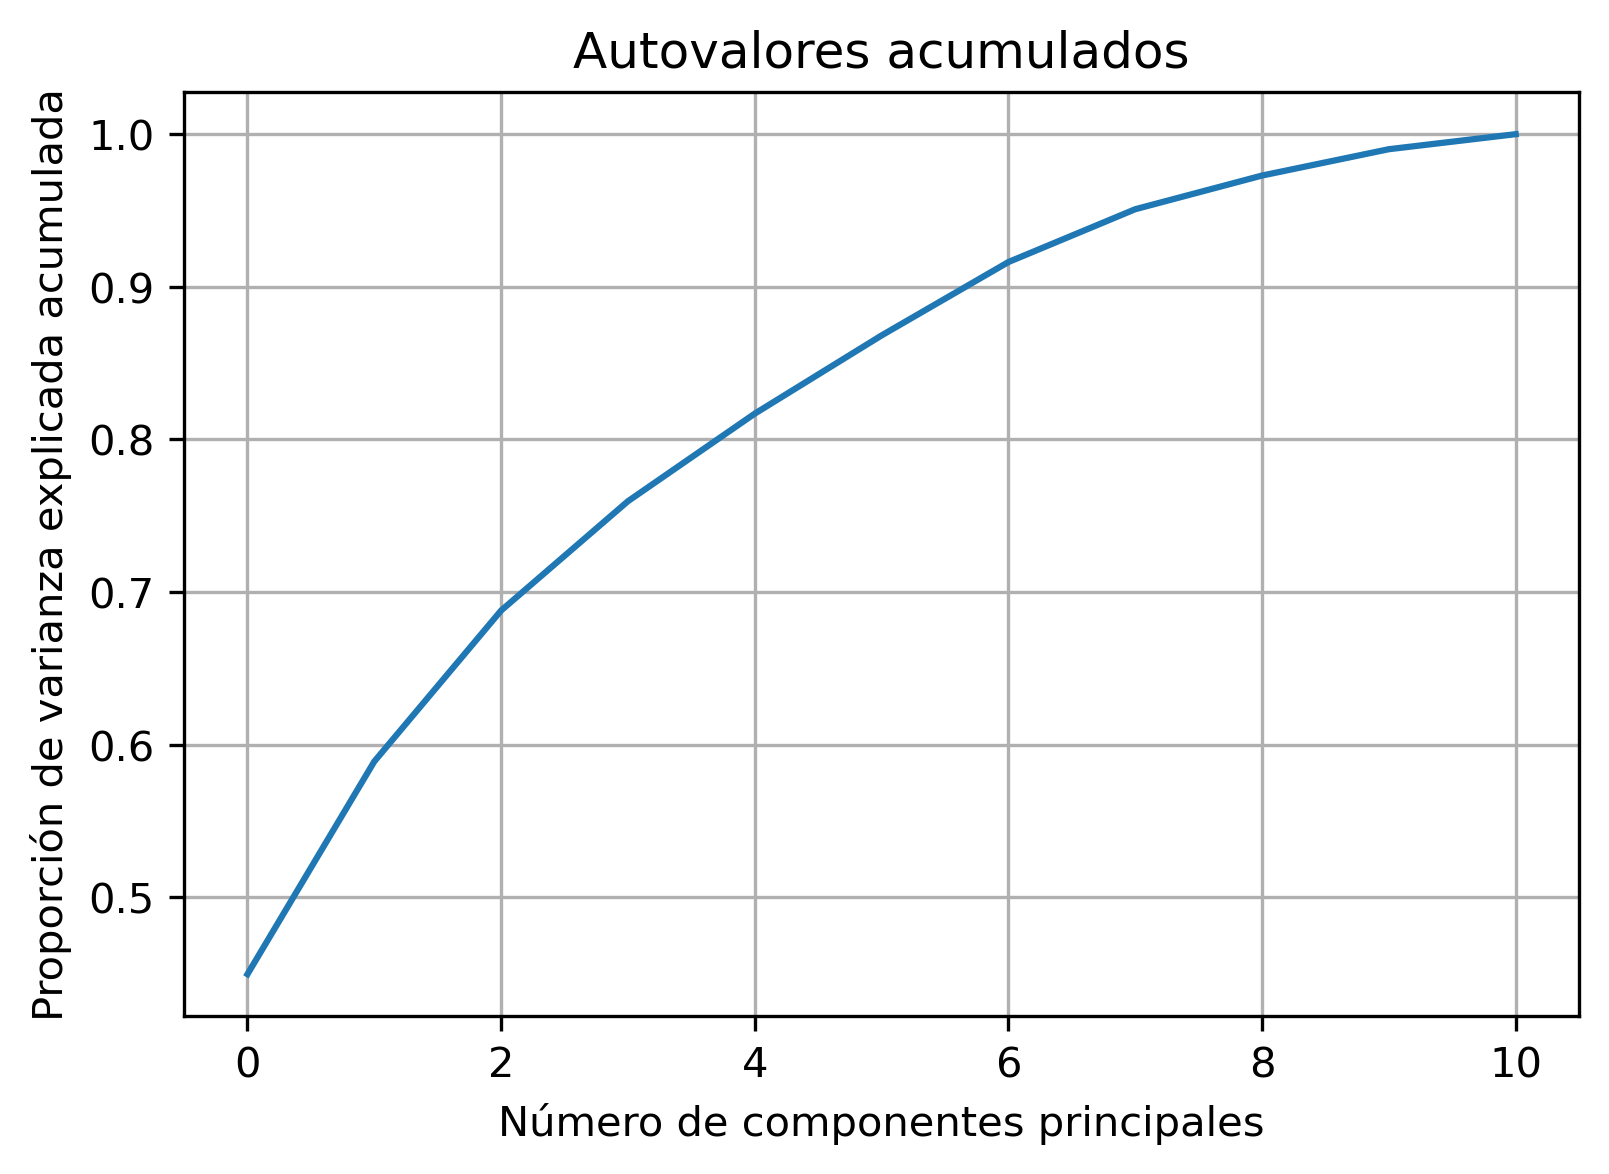

In [95]:
# Aplicar la transformación PCA al nuevo apartamento
apartment_transform = pca.transform(scaler.transform(new_apartment))

# Imprimir la transformación
print("Transformación del nuevo apartamento:")
print(apartment_transform)

# Calcular los autovalores acumulados
cumulative_variance_ratio = np.cumsum(pr_madrid.explained_variance_ratio_)

# Graficar los autovalores acumulados
import matplotlib.pyplot as plt

plt.plot(cumulative_variance_ratio)
plt.title("Autovalores acumulados")
plt.xlabel("Número de componentes principales")
plt.ylabel("Proporción de varianza explicada acumulada")
plt.grid()
plt.show()


In [96]:
# Asignar el número de componentes PCA
number_of_pca_components = 5

# Asignar el número de vecinos que se desea encontrar
knn = 5

# Obtener el número de coeficientes de PCA elegidos en el apartamento de prueba
apart_pca = apartment_transform[:, :number_of_pca_components]

# Obtener el número de coeficientes del modelo
Amad = pca_matrix_scaled[:, :number_of_pca_components]

# Calcular la distancia euclidiana
dist = np.sum((apart_pca - Amad) ** 2, axis=1)

# Seleccionar los índices de los 5 apartamentos más cercanos
knn_tags = np.argsort(dist)[:knn]

# Seleccionar las filas del DataFrame que tienen esos apartamentos
neighbourhood_near = df_madrid_pca.iloc[knn_tags]
print(neighbourhood_near)


     Accommodates  Bathrooms  Bedrooms  Beds  Price  Guests Included  \
50              5        1.0       1.0   1.0   62.0                3   
163             6        2.0       1.0   2.0   67.0                4   
15              4        1.0       1.0   1.0   30.0                1   
2               4        2.0       1.0   1.0   46.0                2   
81              6        2.0       2.0   2.0   72.0                2   

     Extra People  Review Scores Rating   Latitude  Longitude  Square Meter  
50             10                 100.0  40.417070  -3.708815     49.981814  
163             0                  73.0  40.473350  -3.691577     60.015338  
15              0                  99.0  40.428974  -3.697106     49.981814  
2               7                  93.0  40.450210  -3.699102     56.020509  
81             20                  90.0  40.412057  -3.709149     54.998576  
